![title](images/gmit.PNG)

## GMIT HDip Data Analytics 2019
## Fundamentals of Data Analysis - Semester 2 - Assignment 1
## Thomas Healy G00376351

![title](images/numpya.PNG) 

## Table of contents

### 1. Description of the assignment and selection of real world phenomenon
### 2. Investigation of phenomenon's variables
### 3. Synthesis a dataset
### 4. Detail research and implement the simulation

---------------------------------------

# 1. Description of assignment and selection of real world phenomenon

The assignment is re-create a real world phenomenon using the ```numpy.random``` package to model the distributions in the phenomenon I have chosen. The phenomenon I have chosen is that of HR data. The IBM dataset is a popular dataset that IBM developed to allow machine learning be ran on relatively large (1470 rows with 35 columns). It is a contrived dataset as there are serious privacy and ethical issues surrounding the use of 'real' HR data in data science. I have selected this phenomenon as working in HR it can be difficult to find datasets that are relevant and generating my own dataset will be very handy as it can be used for HR or people Analytics purposes. I propose to take a few columns below and plot their distribution and then change some of them and build our own dataset based of that.

As HR has adopted a more data centric mindset, I think HR Generalists/HRBPs should have a good grounding in understanding the data they are guardians for in an organisation and be able to conduct investigation into dataset and extract insights that can enable and improve 

The data(camelCase) that will make up our dataset are :

* EmployeeID
* Age
* Gender
* Commute
* SatisfactionLevel
* WeeklyHours
* Department
* Salary
* TimeSincePromo
* Tenure 
* Manager
* PerformanceRating
* Churn

In [128]:
#Import our Packages, tell jupyter we want our plot inline and set the grid style in seaborn for more contrast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#Removed redundant code
#from pylab import rcParams
#rcParams['figure.figsize'] = (8, 5)
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
import seaborn as sns
sns.set_style("darkgrid")

# 2. Investigation of phenomenon's variables

I will print some decriptive stats here to give us some guidelines of the data we need to re-create. This should take care of the numercial data. I will use countplots to understand the distribution of the categorical variable. 

In [245]:
#TAKEN FROM https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
df = pd.read_csv('IBMHRdata_set.csv')

In [130]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


We have quite a few columns here that we will not be using referring to in our assignment. I will look at the overall info of our data set and then select the columns we will use to base our own data.

In [131]:
print(df.info())
df[['DistanceFromHome','JobSatisfaction','MonthlyIncome', 'PerformanceRating','YearsAtCompany', 'YearsSinceLastPromotion','Age', 'JobSatisfaction']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,DistanceFromHome,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsSinceLastPromotion,Age,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,9.192517,2.728571,6502.931293,3.153741,7.008163,2.187755,36.923810,2.728571
std,8.106864,1.102846,4707.956783,0.360824,6.126525,3.222430,9.135373,1.102846
min,1.000000,1.000000,1009.000000,3.000000,0.000000,0.000000,18.000000,1.000000
25%,2.000000,2.000000,2911.000000,3.000000,3.000000,0.000000,30.000000,2.000000
50%,7.000000,3.000000,4919.000000,3.000000,5.000000,1.000000,36.000000,3.000000
75%,14.000000,4.000000,8379.000000,3.000000,9.000000,3.000000,43.000000,4.000000
max,29.000000,4.000000,19999.000000,4.000000,40.000000,15.000000,60.000000,4.000000


We have some descriptive information that we can use to plug into our random functions. I am going to change some of them though. For instance, Monthly Income, will be changed to something more realistic. I will use plots to understand the shape of the data. I will go through each variable in turn and then re-create a simliar var for our data set. We will have 13 columns and some will be new such as Churn. 

In [132]:
#df.profile_report() Was going to use this command but it involved updating Anaconda and I didnt want to risk it

### 2.2 Plots of Variables

C:\Users\Teamwork\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


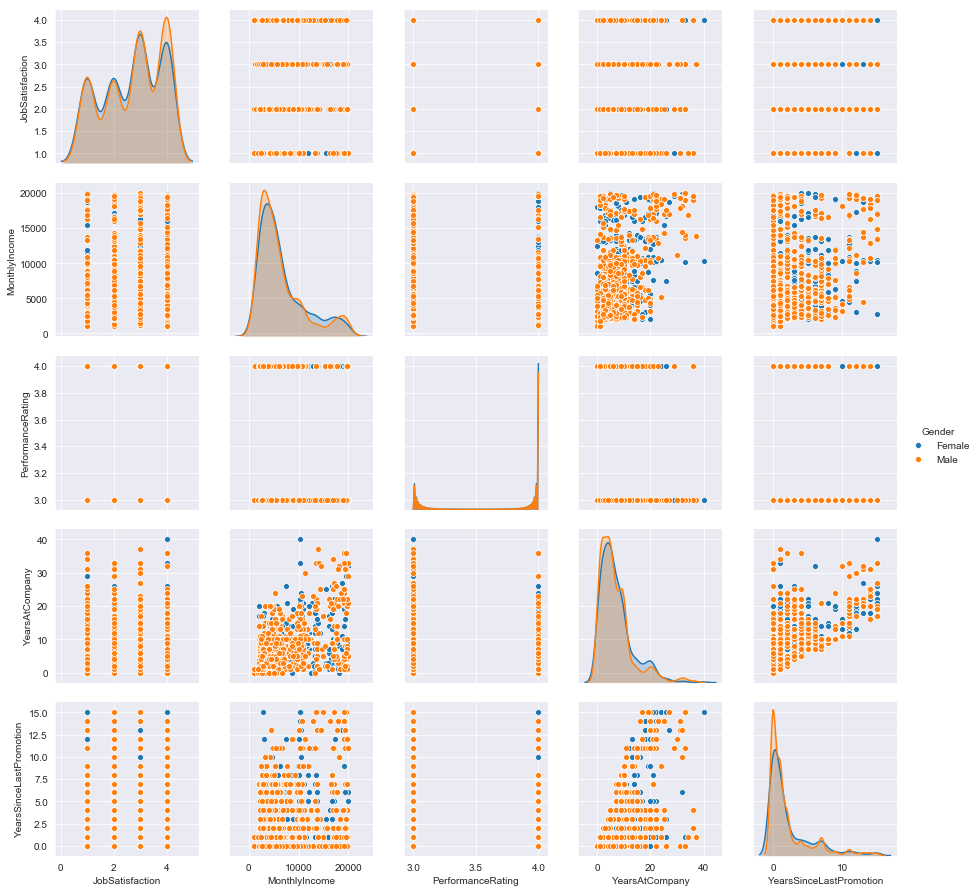

In [133]:
sns.pairplot(df,hue='Gender',vars=['JobSatisfaction', 'MonthlyIncome', 'PerformanceRating','YearsAtCompany', 'YearsSinceLastPromotion'])

We are using the pairplot to view the overall shape of the variables together and look we are using the column __Gender__ to add some contrast and add some info.

In [134]:
dfp = pd.DataFrame(df, columns= ['Gender','JobSatisfaction', 'MonthlyIncome', 'PerformanceRating','YearsAtCompany', 'YearsSinceLastPromotion'])

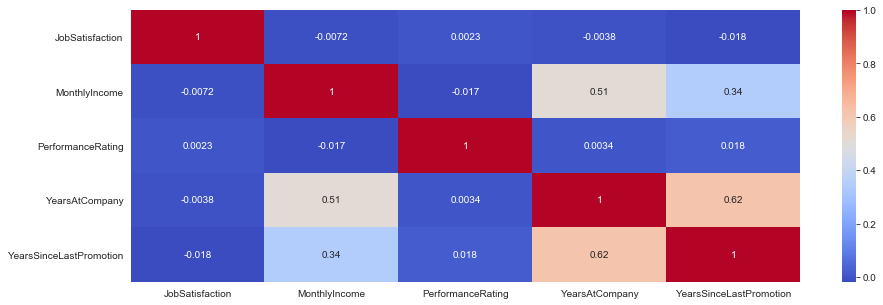

In [135]:
dfp.corr()
sns.heatmap(dfp.corr(), cmap='coolwarm', annot=True)
plt.rcParams["figure.figsize"] = (18,11)
plt.show()

We are using the Pearson correlation matrix to see if we have any noteworthy relationships. It seem we have (all else being equal):

* __Job Satisfaction__ reduces as __Time since last promotion__ increases. (-.018 is a weak correlation)
* __Monthly Income__ increases as __Time at company__ increases. (.52 is a moderate correlation)
* __Monthly Income__ increases as __Time since promotion__ increases (.34 is a slight to moderate correlation)
* __Years at company__ increases as __Time since promotion__ increases (.62 is a moderate correlation)

It might be interesting to break these out by Gender. That is what we will do next.

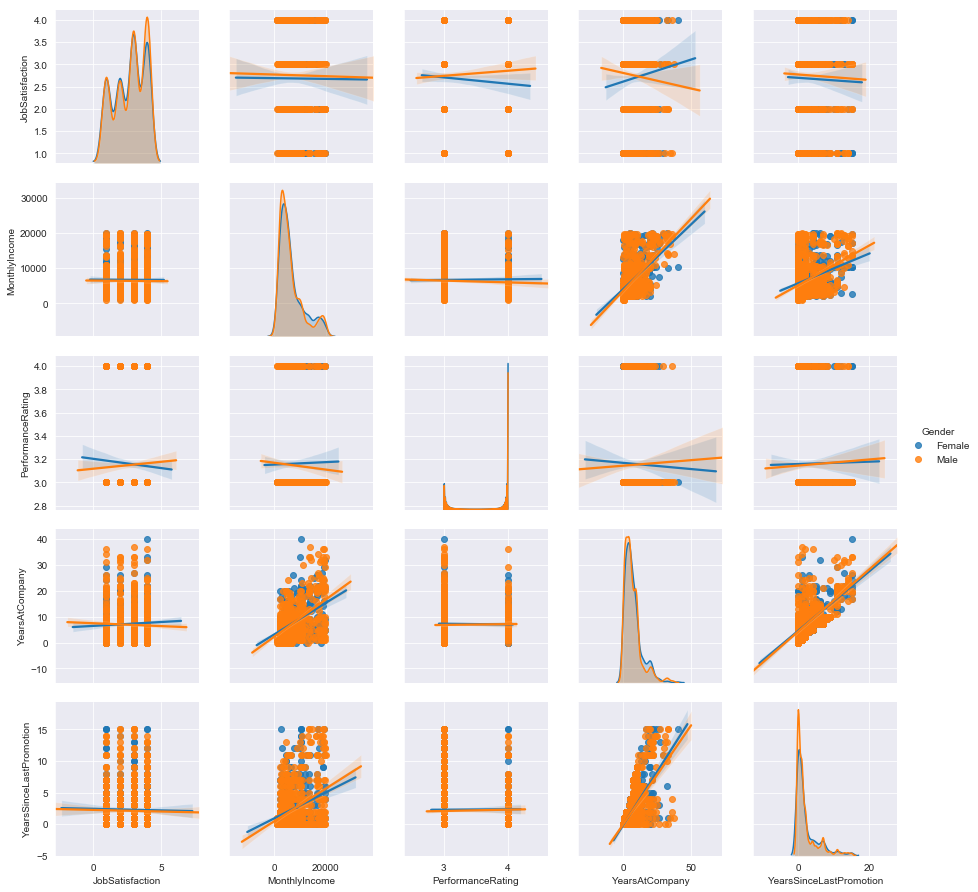

In [136]:
sns.pairplot(dfp, hue='Gender', kind='reg')

Next let's take a brief look at our dataset broken by Gender. First off, it would seem our company has a few gender issues:

* __Monthly Salary__ increases more for males the longer the they are at the company than for females.
* __Performance rating__ reduces for males as __Monthly Income__ increases
* For Males, as performance rating increases so does job satisfaction
* For Females, it is the opposite.

We will now plot our variables individually to understand their distributions better.

### 2.2.1 Age

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

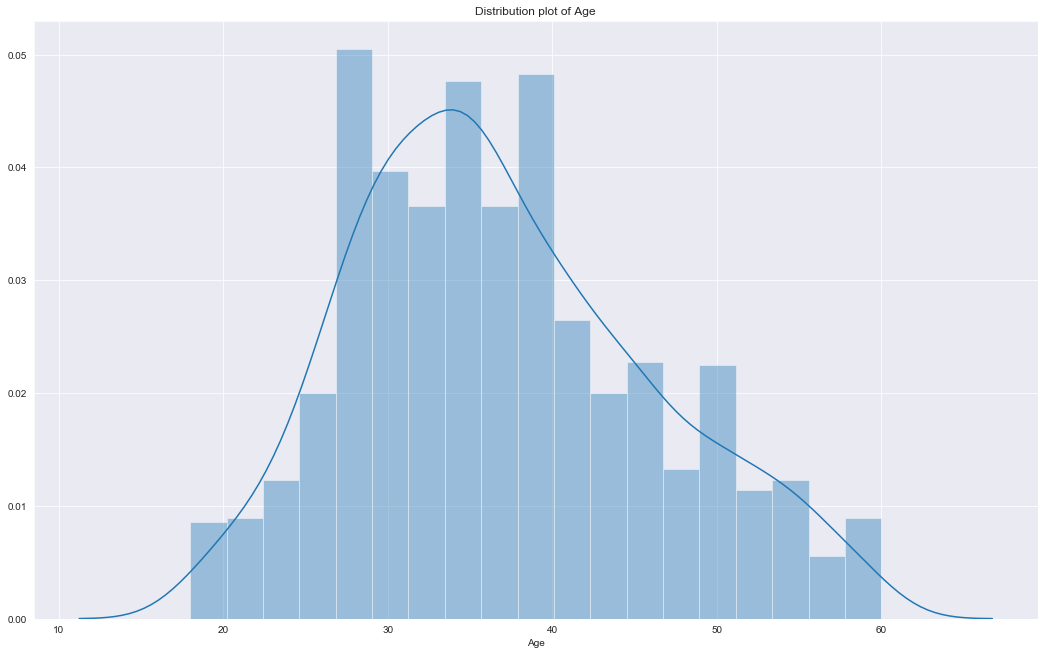

In [137]:
print(sns.distplot(df['Age']))
plt.title('Distribution plot of Age')
plt.show

In [138]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

### 2.2.2 Gender

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

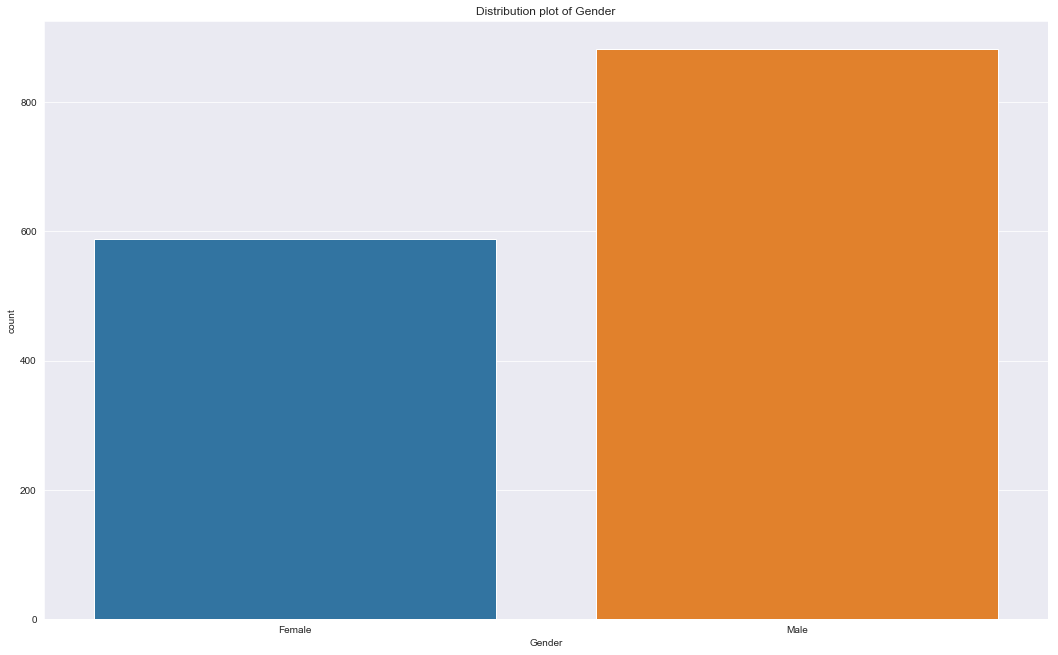

In [139]:
print(sns.countplot(df['Gender']))
plt.title('Distribution plot of Gender')
plt.show

In [140]:
df['Gender'].describe()

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

### 2.2.3 Commute

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

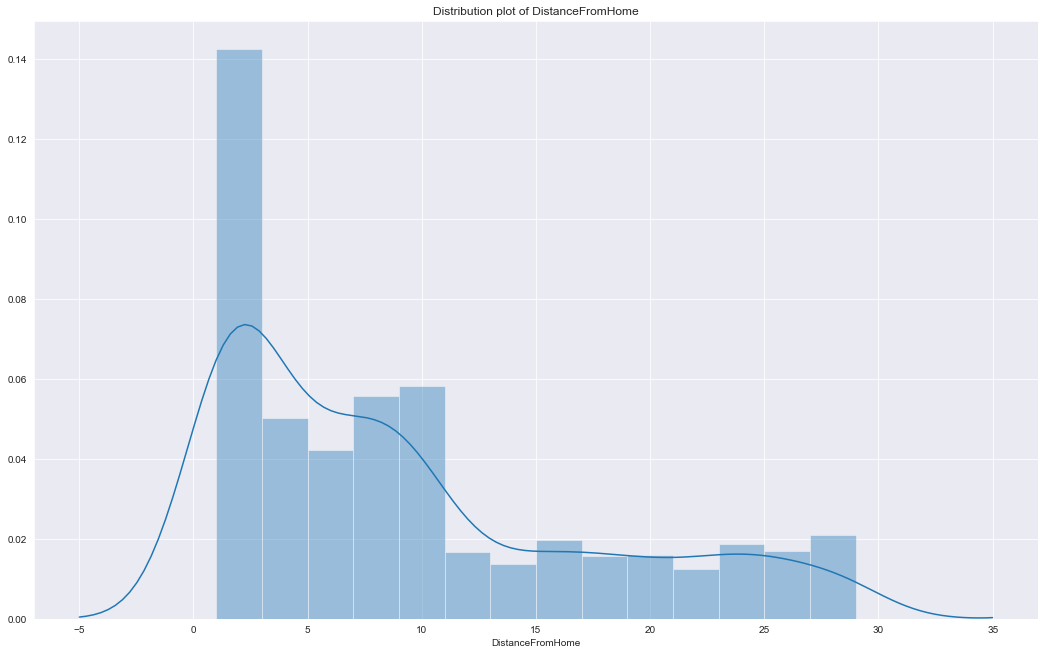

In [141]:
print(sns.distplot(df['DistanceFromHome']))
plt.title('Distribution plot of DistanceFromHome')
plt.show

In [142]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

### 2.2.4 Job Satisfaction

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

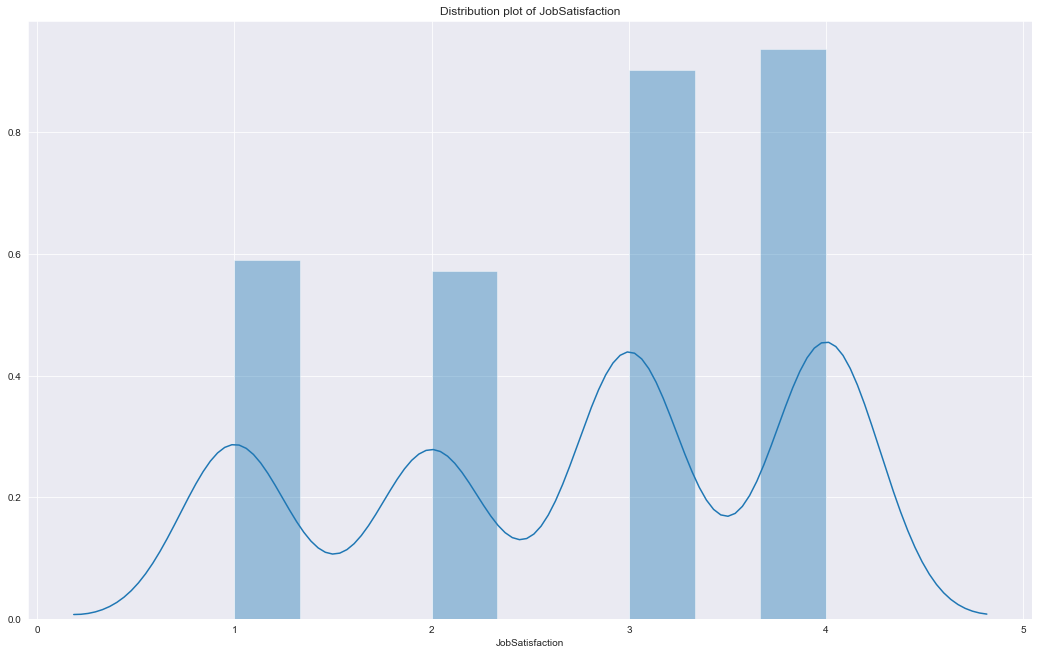

In [143]:
print(sns.distplot(df['JobSatisfaction']))
plt.title('Distribution plot of JobSatisfaction')
plt.show

In [144]:
df['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

### 2.2.5 Hours Worked

C:\Users\Teamwork\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Teamwork\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Teamwork\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


AxesSubplot(0.125,0.125;0.775x0.755)


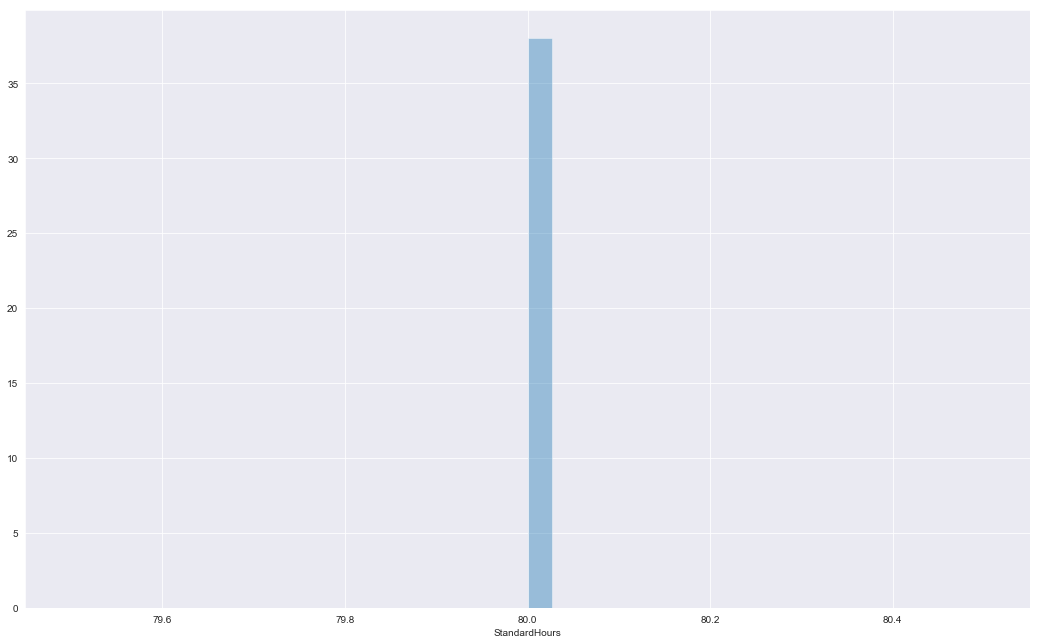

In [145]:
print(sns.distplot(df['StandardHours']))

In [146]:
df['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

Hmm this looks a bit suspicious so I think we will adopt a more realistic approach monthly hours. I am going to choose the normal distribution as it most closely describes the hour data I have seen in HR departments. 

### 2.2.6 Department

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

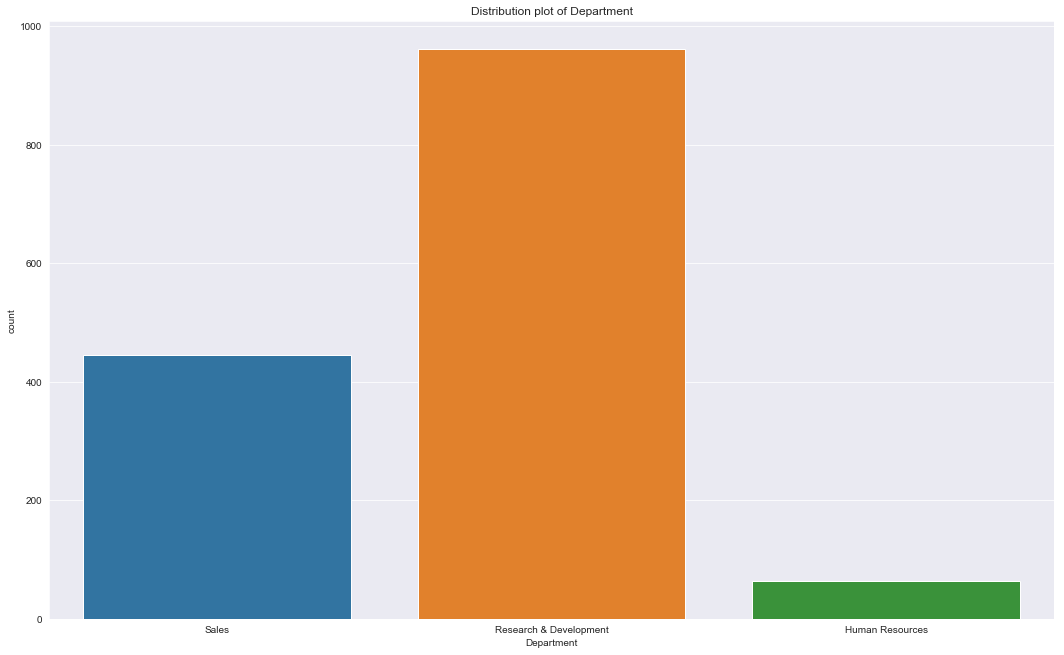

In [147]:
print(sns.countplot(df['Department']))
plt.title('Distribution plot of Department')
plt.show

In [148]:
df['Department'].describe()

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

###  2.2.7 Monthly Income

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

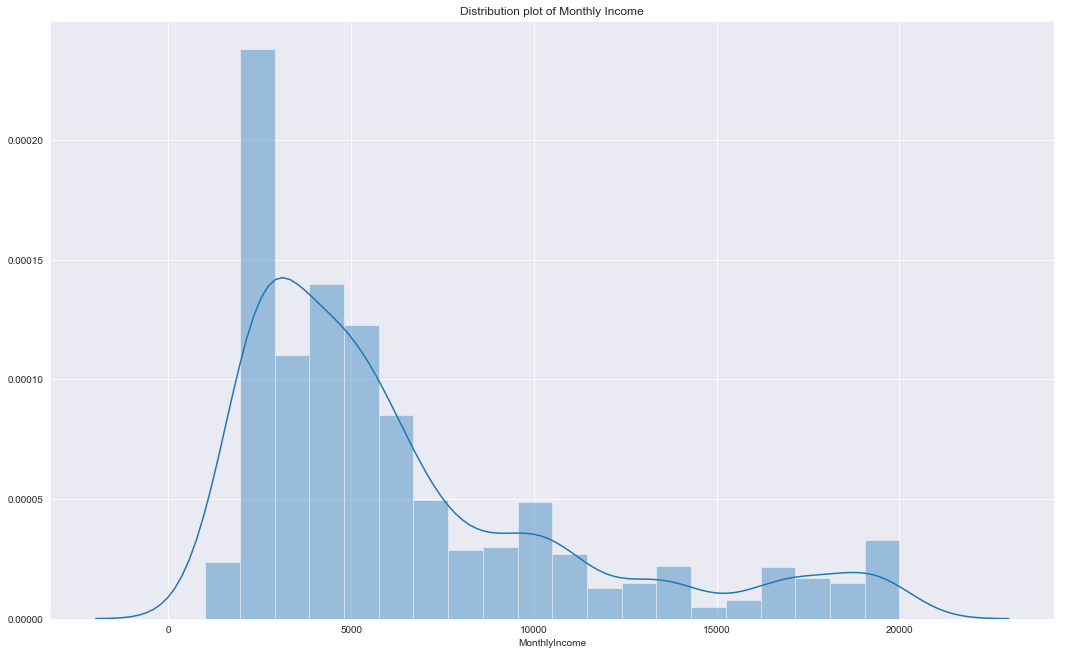

In [149]:
print(sns.distplot(df['MonthlyIncome']))
plt.title('Distribution plot of Monthly Income')
plt.show

In [150]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

### 2.2.7 Years since last Promotion

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

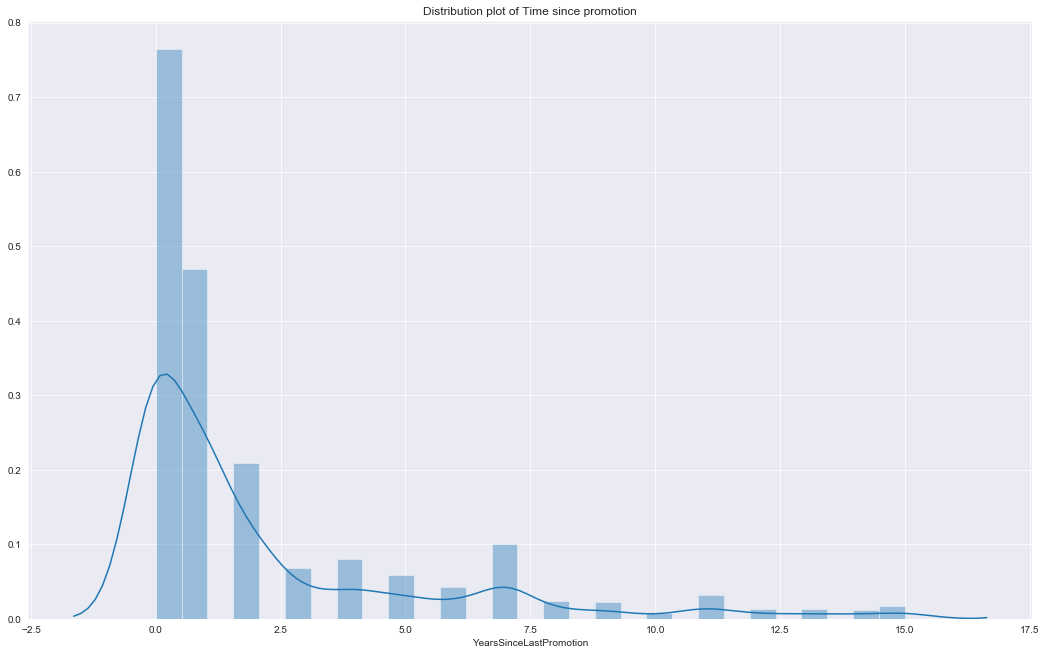

In [151]:
print(sns.distplot(df['YearsSinceLastPromotion']))
plt.title('Distribution plot of Time since promotion')
plt.show

In [152]:
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [153]:
df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

### 2.2.8 Years at Company  (Tenure)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

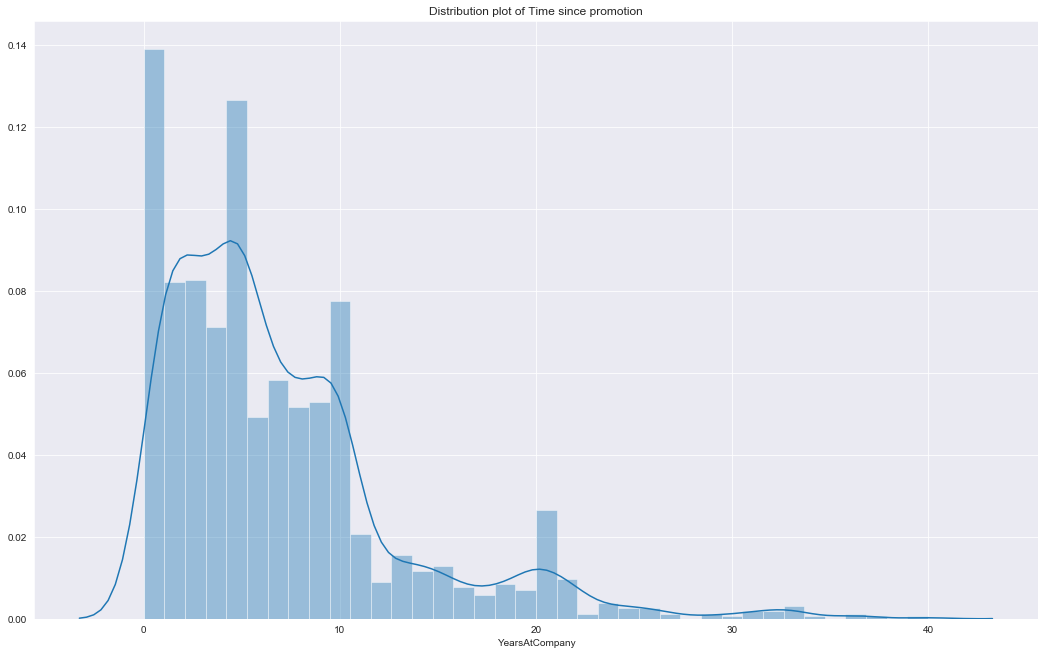

In [154]:
print(sns.distplot(df['YearsAtCompany']))
plt.title('Distribution plot of Time since promotion')
plt.show

In [155]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

### 2.2.8 Manager

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

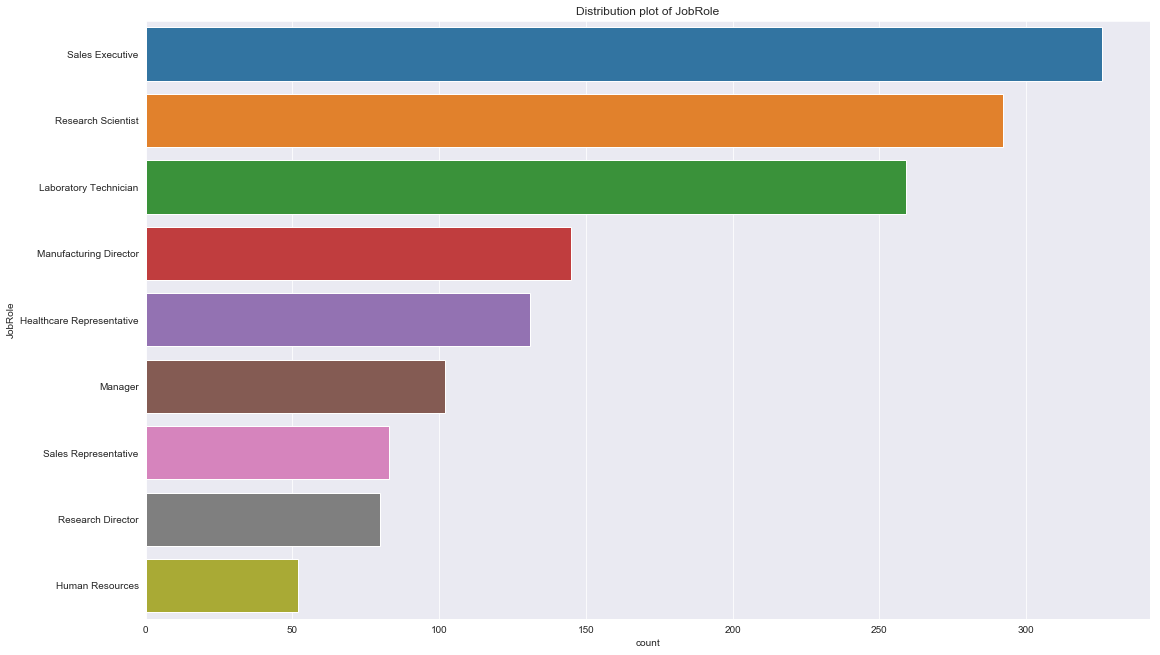

In [156]:
y1 =df['JobRole']
print(sns.countplot(y=y1, data=df))
plt.title('Distribution plot of JobRole')
plt.show

In [157]:
df['JobRole'].describe()

count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object

In [158]:
y1.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

According to the above counts we have 102 managers in a company of 1470. So for our dataset, we will take the figure of 6.9% and use this to randomly assign the manager title to our workforce. 

### 2.2.9 Performance Rating

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

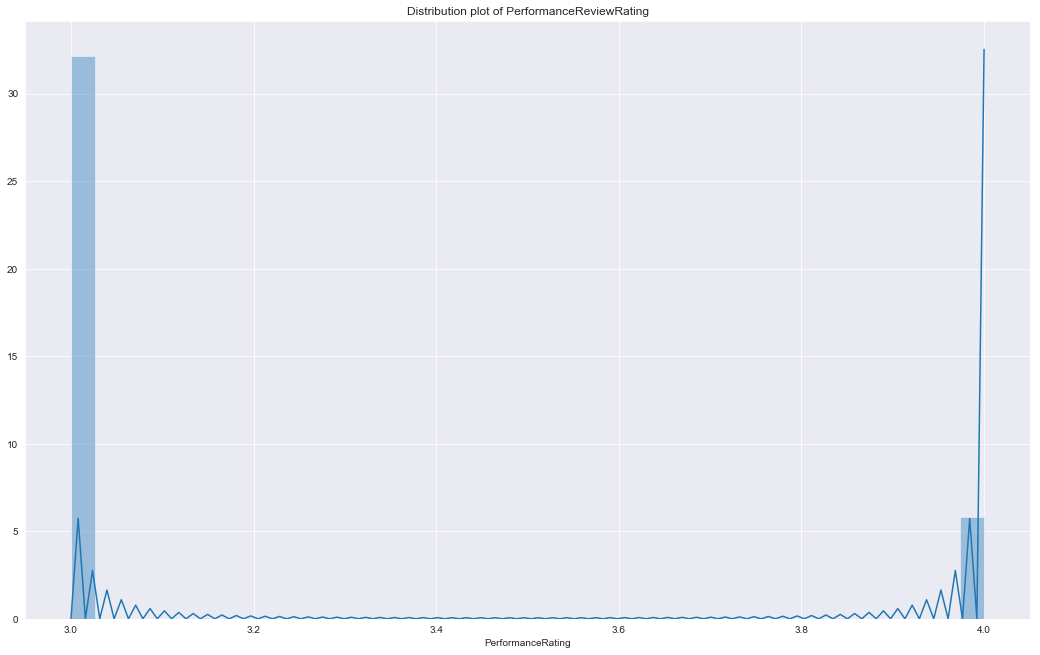

In [159]:
print(sns.distplot(df['PerformanceRating']))
plt.title('Distribution plot of PerformanceReviewRating')
plt.show

In [160]:
df['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

So this looks suspicious also. We only have two values (3 and 4) in the Performance review rating. I am going to re-create this with normal distribution when we look at creating variables.

So we now understand the distributions and properties of our variables. We will now take this understanding and where applicable we will add it to our generated data.

# 3. Synthesis a dataset 

We can create a new dataset in a number of ways. We can generate our data by creating our dataframe and then assign the values we create later for our variables to those cells. Alternatively, we can create our variables and then combine them to create our dataset.
For the assignment, I am going to create a dataset that will hold 750 records for Aero-Tech (Space Above and Beyond ref). I am going to create a dataset with 13 variables modeled of the preceding variable. I will be making changes where I think the contrived data does not align with the observed real world phenomenon.

### 3.1 Create our Dataframe

In [161]:
# Let's create our dataframe
df1 = pd.DataFrame(columns=['EmployeeID','Age', 'Gender', 'Commute', 'SatisfactionLevel', 'WeeklyHours','Department', 'Salary','Tenure', 'Churned/NotChurned'])

In [162]:
print(df1.head())
print(df1.describe())

Empty DataFrame
Columns: [EmployeeID, Age, Gender, Commute, SatisfactionLevel, WeeklyHours, Department, Salary, Tenure, Churned/NotChurned]
Index: []
        EmployeeID  Age  Gender  Commute  SatisfactionLevel  WeeklyHours  \
count            0    0       0        0                  0            0   
unique           0    0       0        0                  0            0   

        Department  Salary  Tenure  Churned/NotChurned  
count            0       0       0                   0  
unique           0       0       0                   0  


### 3.2 Create our variables

Having created our dataframe, we will now create our variables based of the distributions with reference to the IBM dataset. As stated I will be changing variable to align more closely with real world observations. I will then combine the variables  to populate the dataframe we created. 

To create the variables, I will set the seed (if needed): 

```np.random.seed(12)```

Then I will add the logic that will govern the distribution of the variable.

```x = ['Female','Male']```


```gen = np.random.choice(x,p=[0.32, 0.68], size = 750)```

I will plot the distribution and then assign the variable to the dataframe and finally print a description of the variable.

#### 3.2.1 EmployeeID

In [163]:
#Our employee ID is going to be a sequence to uniquely identify our employee. This is a simple sequence of 1 to 750 
EmpID = np.arange(1, 751)

In [164]:
df1['EmployeeID'] = EmpID

In [165]:
print(df1['EmployeeID'].head())

0    1
1    2
2    3
3    4
4    5
Name: EmployeeID, dtype: int32


This is no need to plot this.

#### 3.2.2 Age

In [166]:
np.random.seed(12)
mu, sigma = 36.9, 4.1
age = np.random.normal(mu, sigma, size=750)
#This part caused a problem I have to declare the var dtype by using pandas series structure.
age = pd.Series(age, dtype='float64')

In [167]:
#Sanity Check
age.head()

0    38.839242
1    34.106154
2    37.894002
3    29.926984
4    39.987886
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

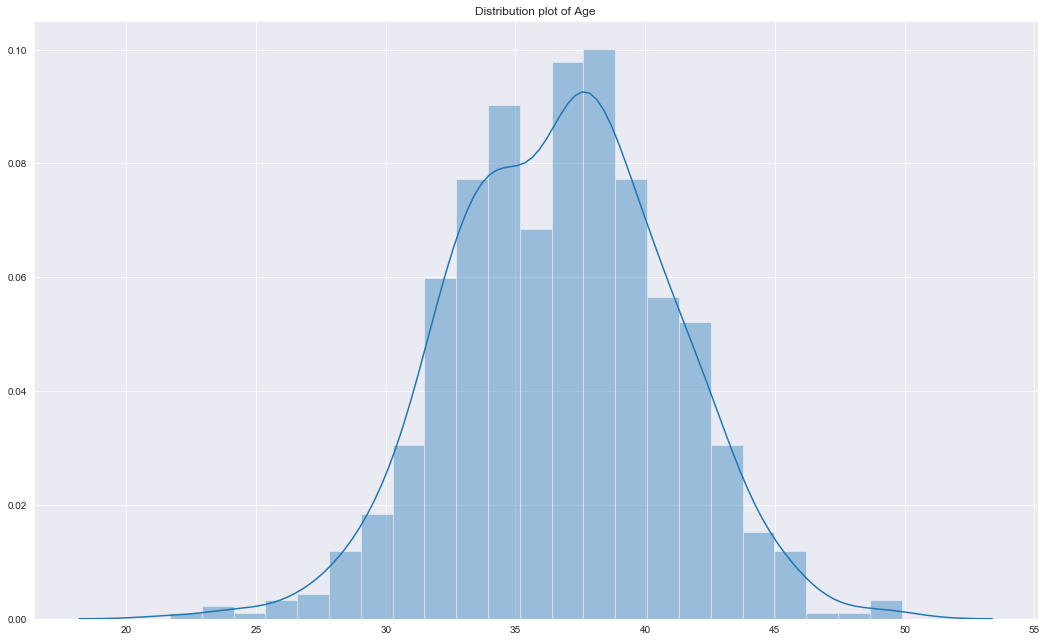

In [168]:
print(sns.distplot(age))
plt.title('Distribution plot of Age')
plt.show

In [169]:
df1['Age'] = age

In [170]:
df1['Age'].describe()

count    750.000000
mean      36.746099
std        4.132843
min       21.686214
25%       33.890697
50%       36.943176
75%       39.575238
max       49.882883
Name: Age, dtype: float64

#### 3.2.3 Gender

I am intentionally skewing the male counts for our gender pay issue.

In [171]:
x = ['Female','Male']
gen = np.random.choice(x,p=[0.32, 0.68], size = 750)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

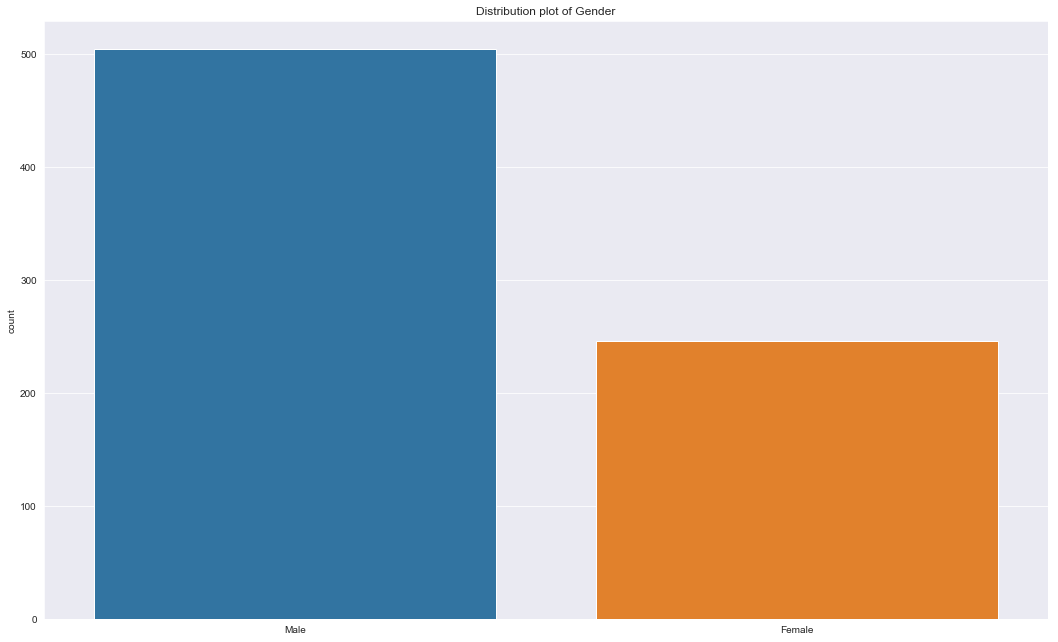

In [172]:
print(sns.countplot(gen))
plt.title('Distribution plot of Gender')
plt.show

In [173]:
#gen = pd.Series(gen)
#gen.head()

In [174]:
df1['Gender'] = gen

In [175]:
df1['Gender'].describe()

count      750
unique       2
top       Male
freq       504
Name: Gender, dtype: object

We now have our categorical column but it will be useful to have a gender numeric column that we can use in our plots. For this we need to create an additional column based of the values for the categorical column for Gender. I like creating the function to do this. We will replace the Male label with a 1 and the Female label with a 0 and the new value to our new column __Gender_num__. 

In [176]:
#Adapted from https://chrisalbon.com/python/data_wrangling/convert_categorical_to_numeric/ accessed on 7 Dec 2019
#Replace Male with a 1 and Female with a 0
def gender_to_numeric(x):
    if x=='Male':
        return 1
    if x == 'Female':
        return 0       

In [177]:
df1['Gender_num'] = df1['Gender'].apply(gender_to_numeric)

#### 3.2.4 CommuteDist

In [178]:
np.random.seed(12)
Comm = np.random.gamma(.9, 15,  750)

<function matplotlib.pyplot.show(*args, **kw)>

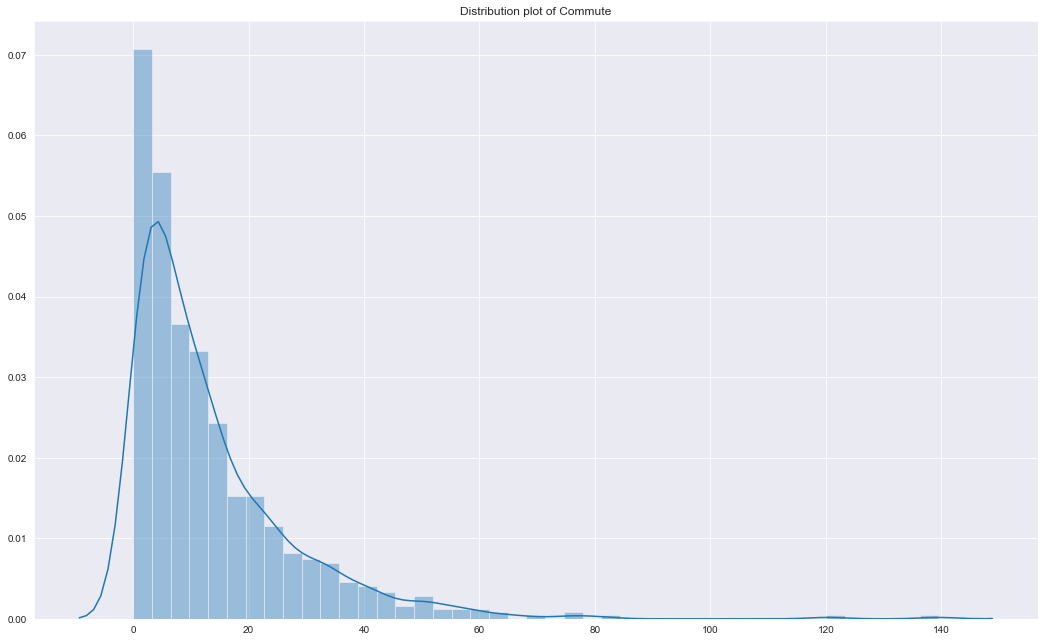

In [179]:
sns.distplot(Comm)
plt.title('Distribution plot of Commute')
plt.show

In [244]:
print("The mean is ",(Comm.mean()).round(2))
print("The std is ",(Comm.std()).round(2))
print("The min is ",(Comm.min()).round(1))
print("The max is ",(Comm.max()).round(2))

The mean is  13.52
The std is  14.64
The min is  0.0
The max is  139.5


In [243]:
df1['Commute'] = Comm
df1['Commute'].describe().round(1)

count    750.0
mean      13.5
std       14.7
min        0.0
25%        3.6
50%        9.2
75%       18.5
max      139.5
Name: Commute, dtype: float64

#### 3.2.5 Satisfaction Level

In [182]:
ratings1 = ['0','1','2', '3', '4']
ratings2 = np.random.choice(ratings1,p=[0,.2,0.5, 0.2,0.1], size = 750)
ratings2 = pd.Series(ratings2, dtype='float64')

<function matplotlib.pyplot.show(*args, **kw)>

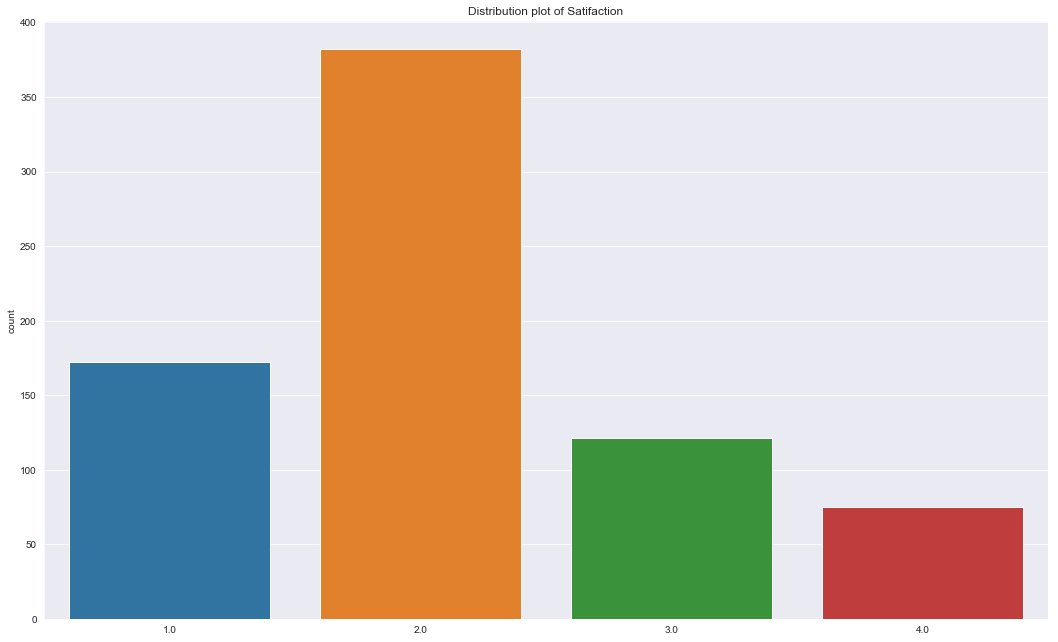

In [183]:
sns.countplot(ratings2)
plt.title('Distribution plot of Satifaction')
plt.show

In [184]:
df1['SatisfactionLevel'] = ratings2 

In [185]:
df1['SatisfactionLevel'].describe()

count    750.000000
mean       2.132000
std        0.879929
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: SatisfactionLevel, dtype: float64

#### 3.2.6 Hours Worked

In [186]:
np.random.seed(12)
mu, sigma = 37.5, .8
hours = np.random.normal(mu, sigma, size=750)

<function matplotlib.pyplot.show(*args, **kw)>

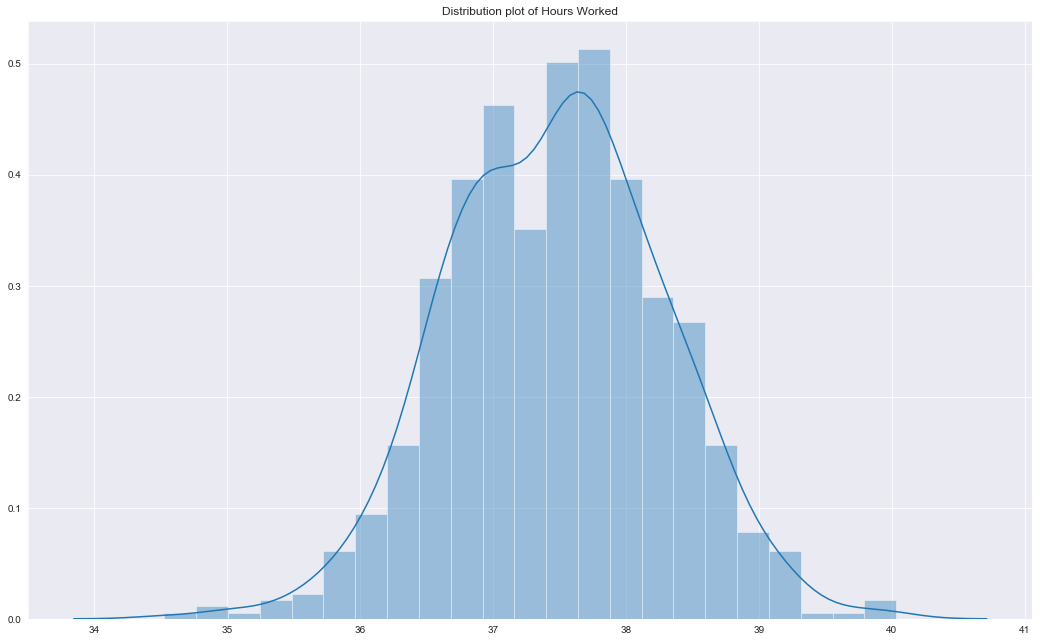

In [187]:
sns.distplot(hours)
plt.title('Distribution plot of Hours Worked')
plt.show

In [188]:
print("The mean is ",(hours.mean()).round(2))
print("The std is ",(hours.std()).round(2))
print("The min is ",(hours.min()).round(2))
print("The max is ",(hours.max()).round(2))

The mean is  37.47
The std is  0.81
The min is  34.53
The max is  40.03


In [189]:
df1['WeeklyHours'] = hours 

In [190]:
df1['WeeklyHours'].describe() 

count    750.000000
mean      37.469971
std        0.806408
min       34.531456
25%       36.912819
50%       37.508425
75%       38.021998
max       40.033245
Name: WeeklyHours, dtype: float64

#### 3.2.7 Department

In [191]:
department = ['PeopleOps', 'Sales', 'G&A', 'ProdDev']
depart = np.random.choice(department, p=[0.1, 0.3,0.3, 0.3],size=750)

<function matplotlib.pyplot.show(*args, **kw)>

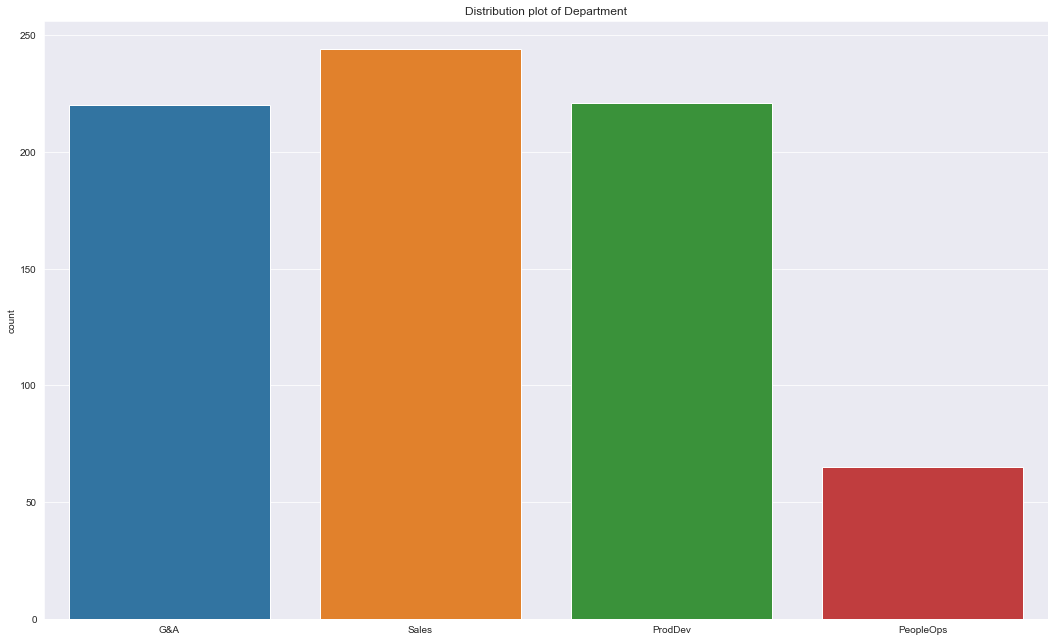

In [192]:
sns.countplot(depart)
plt.title('Distribution plot of Department')
plt.show

In [193]:
df1['Department'] = depart

In [194]:
df1['Department'].describe()

count       750
unique        4
top       Sales
freq        244
Name: Department, dtype: object

#### 3.2.8 Salary

I am going to contrive a gender pay issue in Aero-Tech Industries. I will use a function to do this. We will create a function to skew the values for salary assign to male and female. We do this by increasing the mean to 60k for a male and reducing the mean for a female to 45K. We the create the new __Salary__ column by referring to the __Gender__ column and applying our function.

In [195]:
def gen_sal(Gender):
    if Gender =='Male':
        return np.random.normal(60.6, 1.4)
    elif Gender == 'Female':
        return np.random.normal(45.6,5.2)

In [196]:
df1['Salary'] = df1['Gender'].apply(gen_sal)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

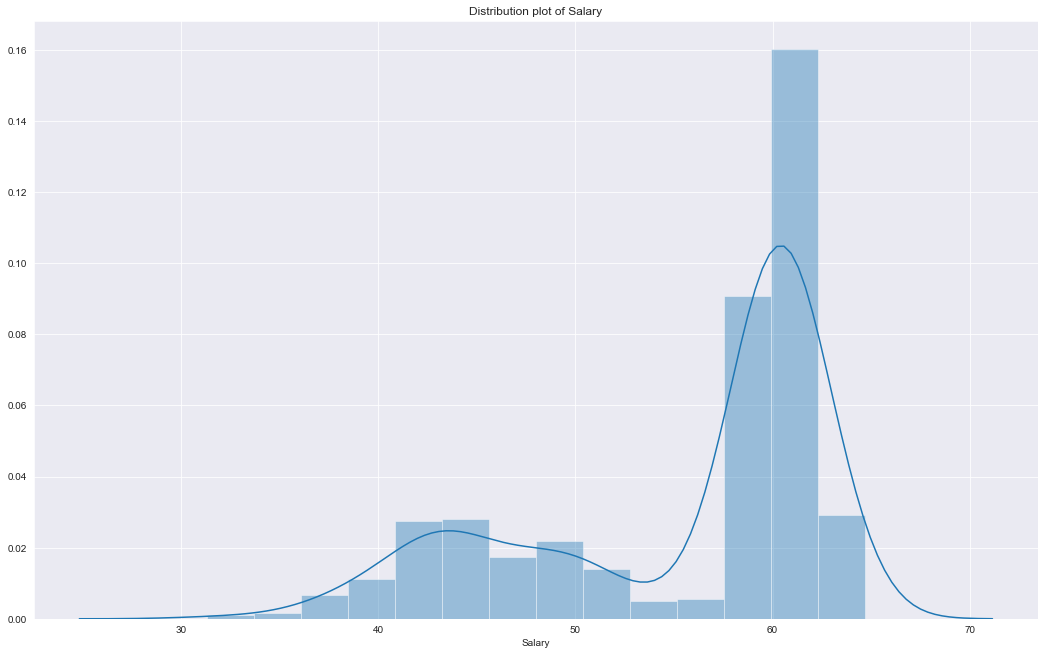

In [197]:
print(sns.distplot(df1['Salary']))
plt.title('Distribution plot of Salary')
plt.show

In [198]:
df1['Salary'].describe()

count    750.000000
mean      55.541342
std        7.667391
min       31.319454
25%       49.482788
50%       59.548614
75%       60.884679
max       64.666916
Name: Salary, dtype: float64

#### 3.2.9 Time Since Promotion

In [199]:
np.random.seed(12)
#shape, scale = 1.1, 2.1
#tslp = np.random.gamma(shape, scale,  750)

tslp1 = ['0','1','2', '3', '5','6','7','8','9', '10','11','12', '13', '14','15']
tslp2 = np.random.choice(tslp1,p=[0.25, 0.15, 0.07, 0.11,0.05, 0.06, 0.06, 0.03,0.05, 0.05, 0.06, 0.02,0.00, 0.02, 0.02], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

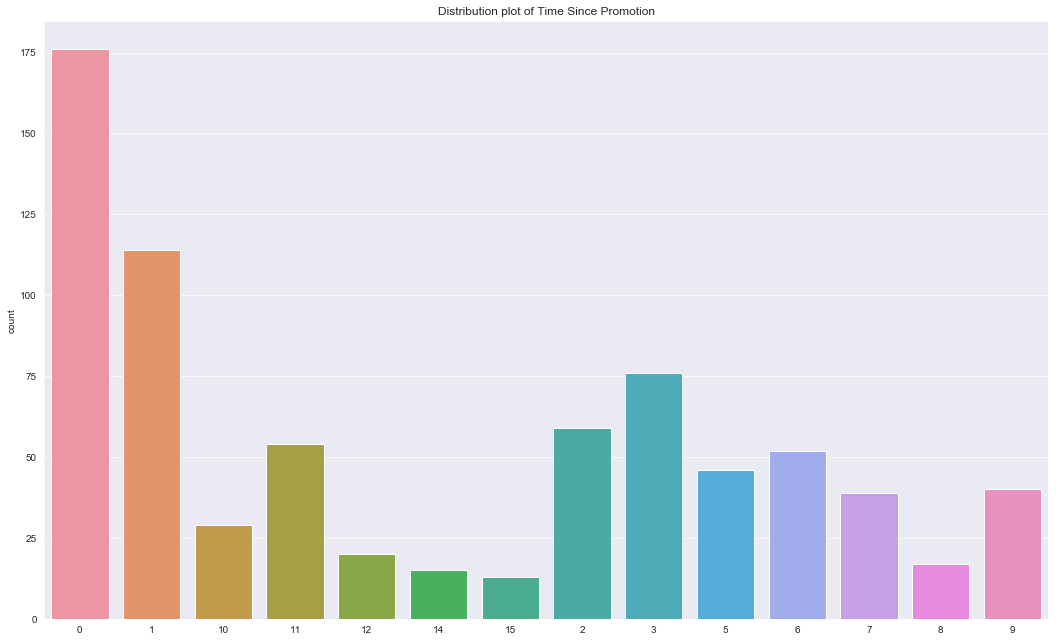

In [200]:
sns.countplot(tslp2)
plt.title('Distribution plot of Time Since Promotion')
plt.show

In [201]:
df1['TimeSincePromotion'] = tslp2

In [202]:
df1['TimeSincePromotion'].describe()

count     750
unique     14
top         0
freq      176
Name: TimeSincePromotion, dtype: object

#### 3.2.10 Tenure

In [203]:
np.random.seed(12)
def gen_ten(Gender):
    if Gender =='Male':
        return np.random.normal(10,2.2)
    elif Gender == 'Female':
        return np.random.normal(9.00, 1.1)

In [204]:
df1['Tenure'] = df1['Gender'].apply(gen_ten)

In [205]:
df1['Tenure'].describe()

count    750.000000
mean       9.605214
std        1.987687
min        1.836505
25%        8.243701
50%        9.484756
75%       10.805032
max       16.966425
Name: Tenure, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

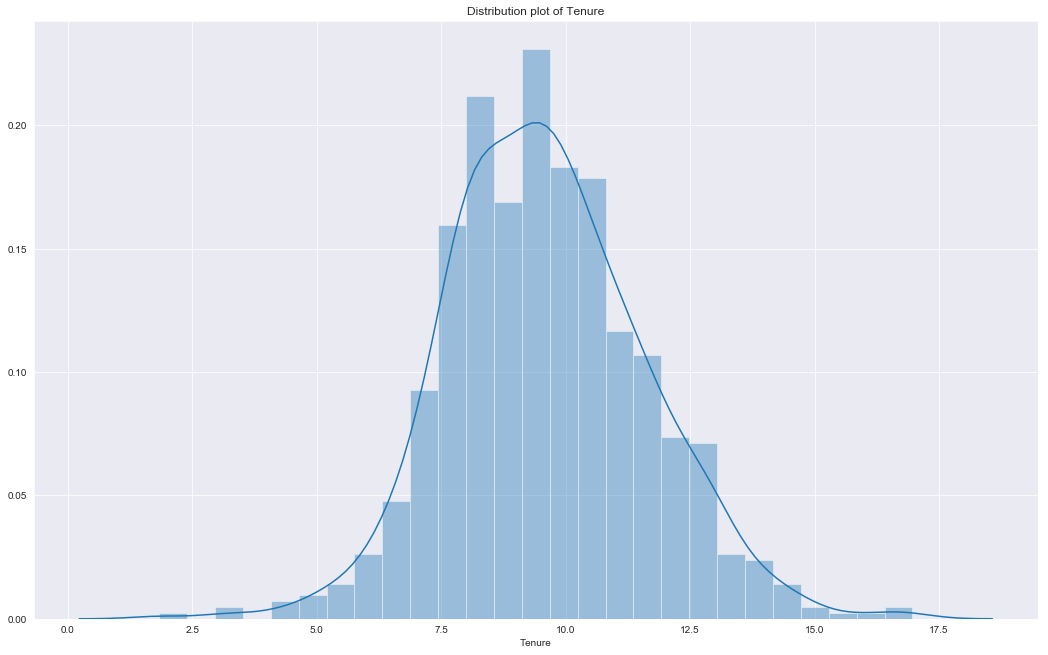

In [206]:
print(sns.distplot(df1['Tenure']))
plt.title('Distribution plot of Tenure')
plt.show

In [207]:
#df1['Tenure'] = ten

In [208]:
df1['Tenure'].describe()

count    750.000000
mean       9.605214
std        1.987687
min        1.836505
25%        8.243701
50%        9.484756
75%       10.805032
max       16.966425
Name: Tenure, dtype: float64

#### 3.2.11 Manager

In [209]:
man1 = ['Manager','IC']
man2 = np.random.choice(man1,p=[0.07, 0.93], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

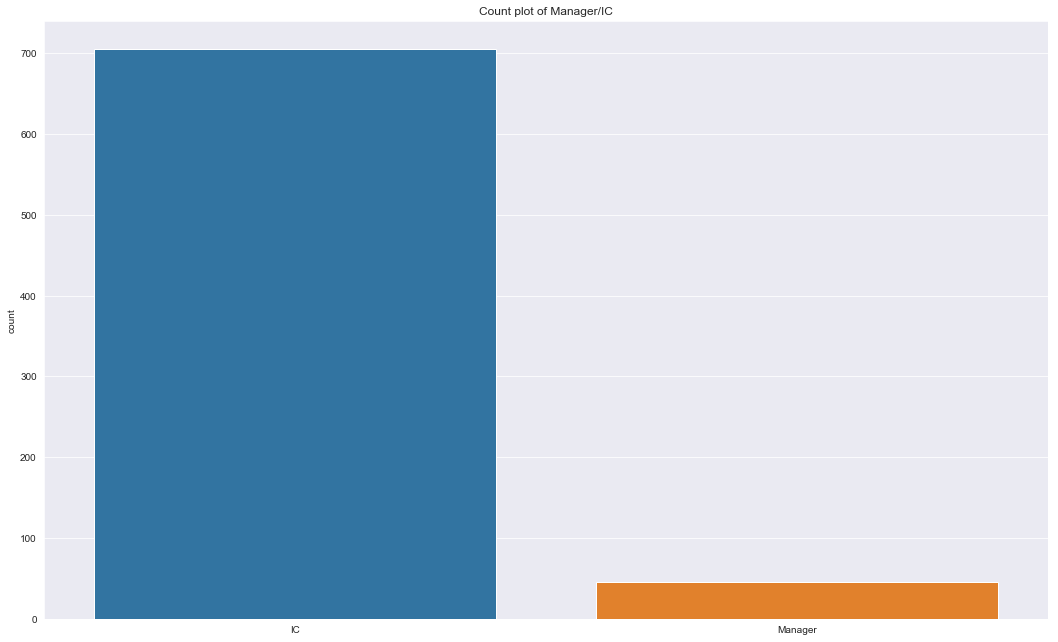

In [210]:
sns.countplot(man2)
plt.title('Count plot of Manager/IC')
plt.show

In [211]:
df1['Manager/IC'] = man2

In [212]:
df1['Manager/IC'].describe() 

count     750
unique      2
top        IC
freq      705
Name: Manager/IC, dtype: object

#### 3.2.12 Performance Rating

So from our original dataset, the performance review data was odd. Normally in HR, you would have a 4,5 or 6 point scale to place people's performance on. The observation that only two points exist in the scale means that either they have a binary performance review process where if you are good you get a four or if you need to improve you get a 3, or something is wrong with our data. In either case I think we will use a 6 point scale for our review. 

We have two ways to map our distribution, we can use the normal curve or we can use a "power tail" or Parentian (Pareto) distribution (Adapted from O’BOYLE JR, E,. AGUINIS, H, 2012). I think we will map both and discuss.

In [213]:
np.random.seed(12)
mu, sigma = 3.2, .7 #mean and std
PerRat = np.random.normal(mu, sigma, size=750)
perrat1 = pd.Series(PerRat)

<function matplotlib.pyplot.show(*args, **kw)>

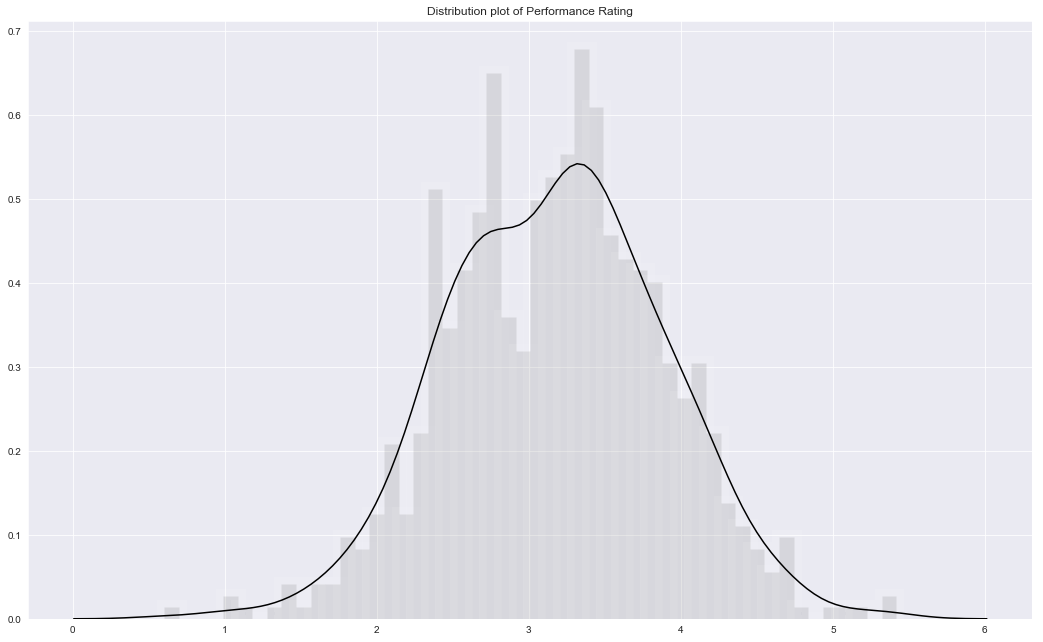

In [214]:
#Taken from https://www.datacamp.com/community/tutorials/probability-distributions-python
ax = sns.distplot(PerRat,
                  bins=50,
                  kde=True,
                  color='Black',
                  hist_kws={"linewidth": 15,'alpha':.1})
plt.title('Distribution plot of Performance Rating')
plt.show

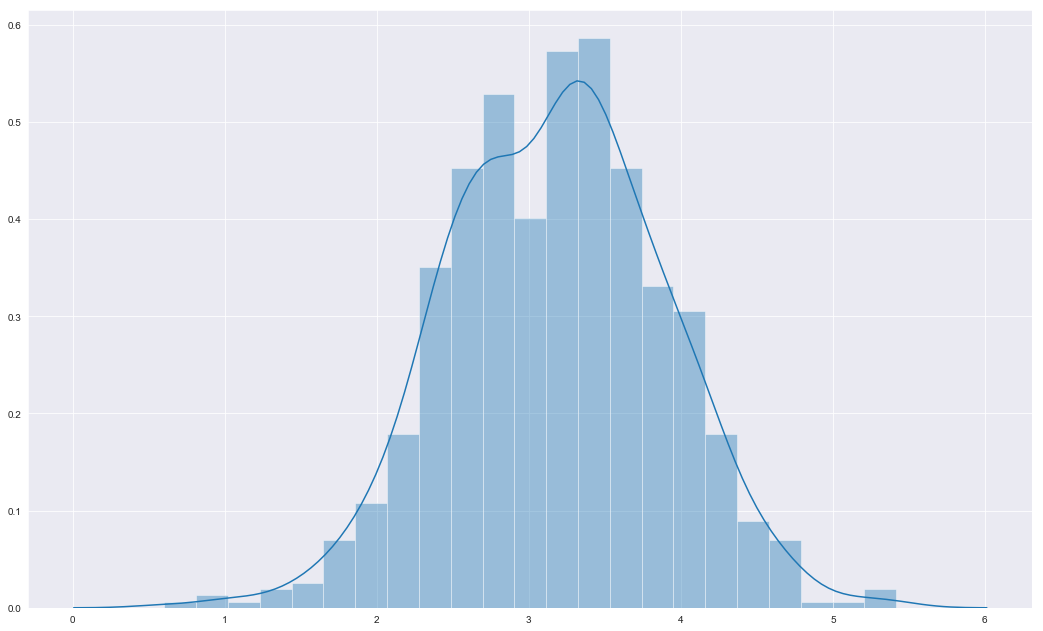

In [215]:
sns.distplot(PerRat)

In [216]:
print(PerRat.mean())
print(PerRat.std())
print(PerRat.min())
print(PerRat.max())

3.173724272980468
0.7051367070111626
0.6025243846672126
5.416589782792347


In [217]:
np.random.seed(12)
a, m = 11.36, 2.9  # shape and mode
PerRat2 = (np.random.pareto(a, 750) + 1) * m

<function matplotlib.pyplot.show(*args, **kw)>

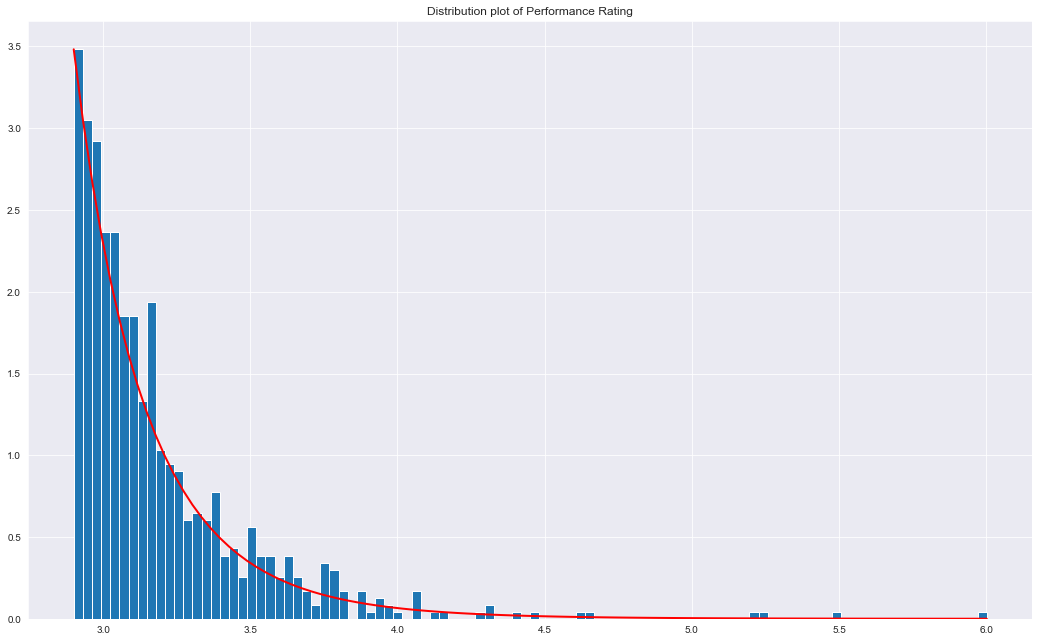

In [218]:
count, bins, _ = plt.hist(PerRat2, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.title('Distribution plot of Performance Rating')
plt.show

In [219]:
print("The mean is ",(PerRat2.mean()).round(2))
print("The std is ",(PerRat2.std()).round(2))
print("The min is ",(PerRat2.min()).round(2))
print("The max is ",(PerRat2.max()).round(2))

The mean is  3.19
The std is  0.33
The min is  2.9
The max is  6.0


In [220]:
df1['Performance Rating'] = PerRat2

In [221]:
#df1['PerRat'].describe() 
df1['Performance Rating'].describe()

count    750.000000
mean       3.188364
std        0.326269
min        2.900577
25%        2.979192
50%        3.086935
75%        3.276487
max        6.001588
Name: Performance Rating, dtype: float64

In [222]:
perrat1.describe()

count    750.000000
mean       3.173724
std        0.705607
min        0.602524
25%        2.686216
50%        3.207372
75%        3.656748
max        5.416590
dtype: float64

#### 3.2.13 Churn

I am adding a __Churned/NotChurned__ column which will be assigned using the __Gender__ column as a reference column. 1 means they have left Aero-Tech Industries and 0 means they are still there.

In [223]:
churnval = ['1','0']
def churn_val(valchurn):
    if valchurn == 'Male':
        return np.random.choice(churnval, p=[0.12, 0.88])
    if valchurn == 'Female':
        return np.random.choice(churnval, p=[0.22, 0.78])

In [224]:
df1['Churned/NotChurned'] = df1['Gender'].apply(churn_val)

<function matplotlib.pyplot.show(*args, **kw)>

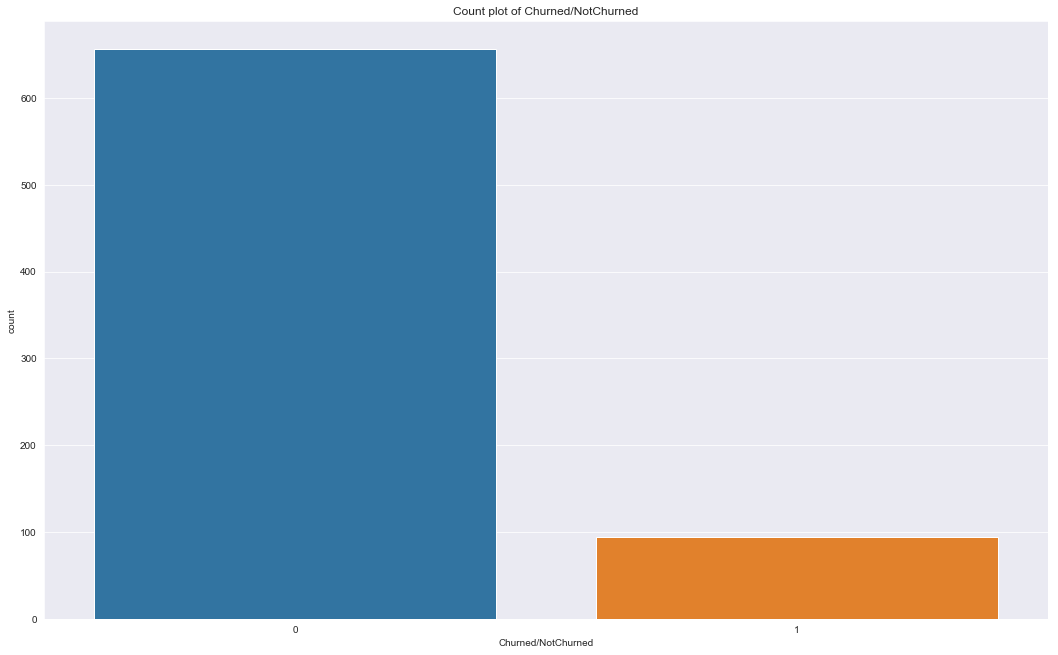

In [225]:
sns.countplot(df1['Churned/NotChurned'])
plt.title('Count plot of Churned/NotChurned')
plt.show

In [226]:
#df1['Churned/Not-Churned'] = churn2

We have now created our variables. We manipulated our variables that when we investigate we should find that there are differences based on the feature of whether the observation involved a male or female worker. We have changed the salary distribution to a normal distribution. We will now print our dataset and investigate the new dataset.

# 4. Explore new dataset

In [246]:
print((df1.describe()).round(2))

       EmployeeID     Age  Commute  SatisfactionLevel  WeeklyHours  Salary  \
count      750.00  750.00   750.00             750.00       750.00  750.00   
mean       375.50   36.75    13.52               2.13        37.47   55.54   
std        216.65    4.13    14.65               0.88         0.81    7.67   
min          1.00   21.69     0.01               1.00        34.53   31.32   
25%        188.25   33.89     3.58               2.00        36.91   49.48   
50%        375.50   36.94     9.19               2.00        37.51   59.55   
75%        562.75   39.58    18.50               3.00        38.02   60.88   
max        750.00   49.88   139.50               4.00        40.03   64.67   

       Tenure  Gender_num  Performance Rating  
count  750.00      750.00              750.00  
mean     9.61        0.67                3.19  
std      1.99        0.47                0.33  
min      1.84        0.00                2.90  
25%      8.24        0.00                2.98  
50%      

In [247]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
EmployeeID            750 non-null int32
Age                   750 non-null float64
Gender                750 non-null object
Commute               750 non-null float64
SatisfactionLevel     750 non-null float64
WeeklyHours           750 non-null float64
Department            750 non-null object
Salary                750 non-null float64
Tenure                750 non-null float64
Churned/NotChurned    750 non-null object
Gender_num            750 non-null int64
TimeSincePromotion    750 non-null object
Manager/IC            750 non-null object
Performance Rating    750 non-null float64
dtypes: float64(7), int32(1), int64(1), object(5)
memory usage: 79.2+ KB
None


In [248]:
print(df1.head())

   EmployeeID        Age  Gender    Commute  SatisfactionLevel  WeeklyHours  \
0           1  38.839242    Male   1.901662                3.0    37.878389   
1           2  34.106154  Female   3.649100                4.0    36.954859   
2           3  37.894002  Female   0.136664                3.0    37.693952   
3           4  29.926984    Male  47.764012                1.0    36.139411   
4           5  39.987886  Female   4.018673                2.0    38.102514   

  Department     Salary     Tenure Churned/NotChurned  Gender_num  \
0        G&A  59.423662  11.040569                  0           1   
1      Sales  41.556012   8.250432                  0           0   
2      Sales  45.150749   9.266683                  0           0   
3    ProdDev  60.093021   6.258382                  0           1   
4      Sales  31.319454   9.828457                  0           0   

  TimeSincePromotion Manager/IC  Performance Rating  
0                  0         IC            2.943058  
1 

In [230]:
print(df1.columns)

Index(['EmployeeID', 'Age', 'Gender', 'Commute', 'SatisfactionLevel',
       'WeeklyHours', 'Department', 'Salary', 'Tenure', 'Churned/NotChurned',
       'Gender_num', 'TimeSincePromotion', 'Manager/IC', 'Performance Rating'],
      dtype='object')


In [231]:
#df1.corr()
#sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)
#plt.show()
#Code redundant

We will now write the new dataset to a csv file called ```newdataset.csv``` . We then read  in this dataset and assign it ```df3``` .

In [232]:
df1.to_csv('newdataset.csv',index=False)

In [233]:
df3 = pd.read_csv('newdataset.csv')

In [234]:
print(df3.columns)

Index(['EmployeeID', 'Age', 'Gender', 'Commute', 'SatisfactionLevel',
       'WeeklyHours', 'Department', 'Salary', 'Tenure', 'Churned/NotChurned',
       'Gender_num', 'TimeSincePromotion', 'Manager/IC', 'Performance Rating'],
      dtype='object')


In [235]:
df3.describe()

,EmployeeID,Age,Commute,SatisfactionLevel,WeeklyHours,Salary,Tenure,Churned/NotChurned,Gender_num,TimeSincePromotion,Performance Rating
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,36.746099,13.516834,2.132000,37.469971,55.541342,9.605214,0.125333,0.672000,4.400000,3.188364
std,216.65064,4.132843,14.652781,0.879929,0.806408,7.667391,1.987687,0.331317,0.469798,4.316268,0.326269
min,1.00000,21.686214,0.007888,1.000000,34.531456,31.319454,1.836505,0.000000,0.000000,0.000000,2.900577
25%,188.25000,33.890697,3.582915,2.000000,36.912819,49.482788,8.243701,0.000000,0.000000,1.000000,2.979192
50%,375.50000,36.943176,9.192478,2.000000,37.508425,59.548614,9.484756,0.000000,1.000000,3.000000,3.086935
75%,562.75000,39.575238,18.500514,3.000000,38.021998,60.884679,10.805032,0.000000,1.000000,7.750000,3.276487
max,750.00000,49.882883,139.503532,4.000000,40.033245,64.666916,16.966425,1.000000,1.000000,15.000000,6.001588


## Our synthesised dataset in full

In [236]:
df3

,EmployeeID,Age,Gender,Commute,SatisfactionLevel,WeeklyHours,Department,Salary,Tenure,Churned/NotChurned,Gender_num,TimeSincePromotion,Manager/IC,Performance Rating
0,1,38.839242,Male,1.901662,3.0,37.878389,G&A,59.423662,11.040569,0,1,0,IC,2.943058
1,2,34.106154,Female,3.649100,4.0,36.954859,Sales,41.556012,8.250432,0,0,7,IC,3.265157
2,3,37.894002,Female,0.136664,3.0,37.693952,Sales,45.150749,9.266683,0,0,1,IC,2.979072
3,4,29.926984,Male,47.764012,1.0,36.139411,ProdDev,60.093021,6.258382,0,1,3,IC,3.101473
4,5,39.987886,Female,4.018673,2.0,38.102514,Sales,31.319454,9.828457,0,0,0,IC,2.903751
5,6,30.607643,Female,43.423278,1.0,36.272223,Sales,52.296566,7.311807,0,0,11,IC,3.617119
6,7,36.921021,Female,0.017221,2.0,37.504102,Sales,41.988583,9.005640,0,0,11,IC,3.553861
7,8,36.407067,Male,10.540201,2.0,37.403818,ProdDev,60.229177,9.735499,0,1,0,IC,2.908691
8,9,33.591374,Female,20.430832,2.0,36.854414,Sales,44.003465,8.112320,0,0,12,IC,3.825130
9,10,48.674460,Male,20.194341,1.0,39.797456,ProdDev,59.609152,16.318003,0,1,0,IC,2.937921


We will run some plots to see the relationships between our variables. The pairplot and heatmap for correlation are particularily useful for this. 

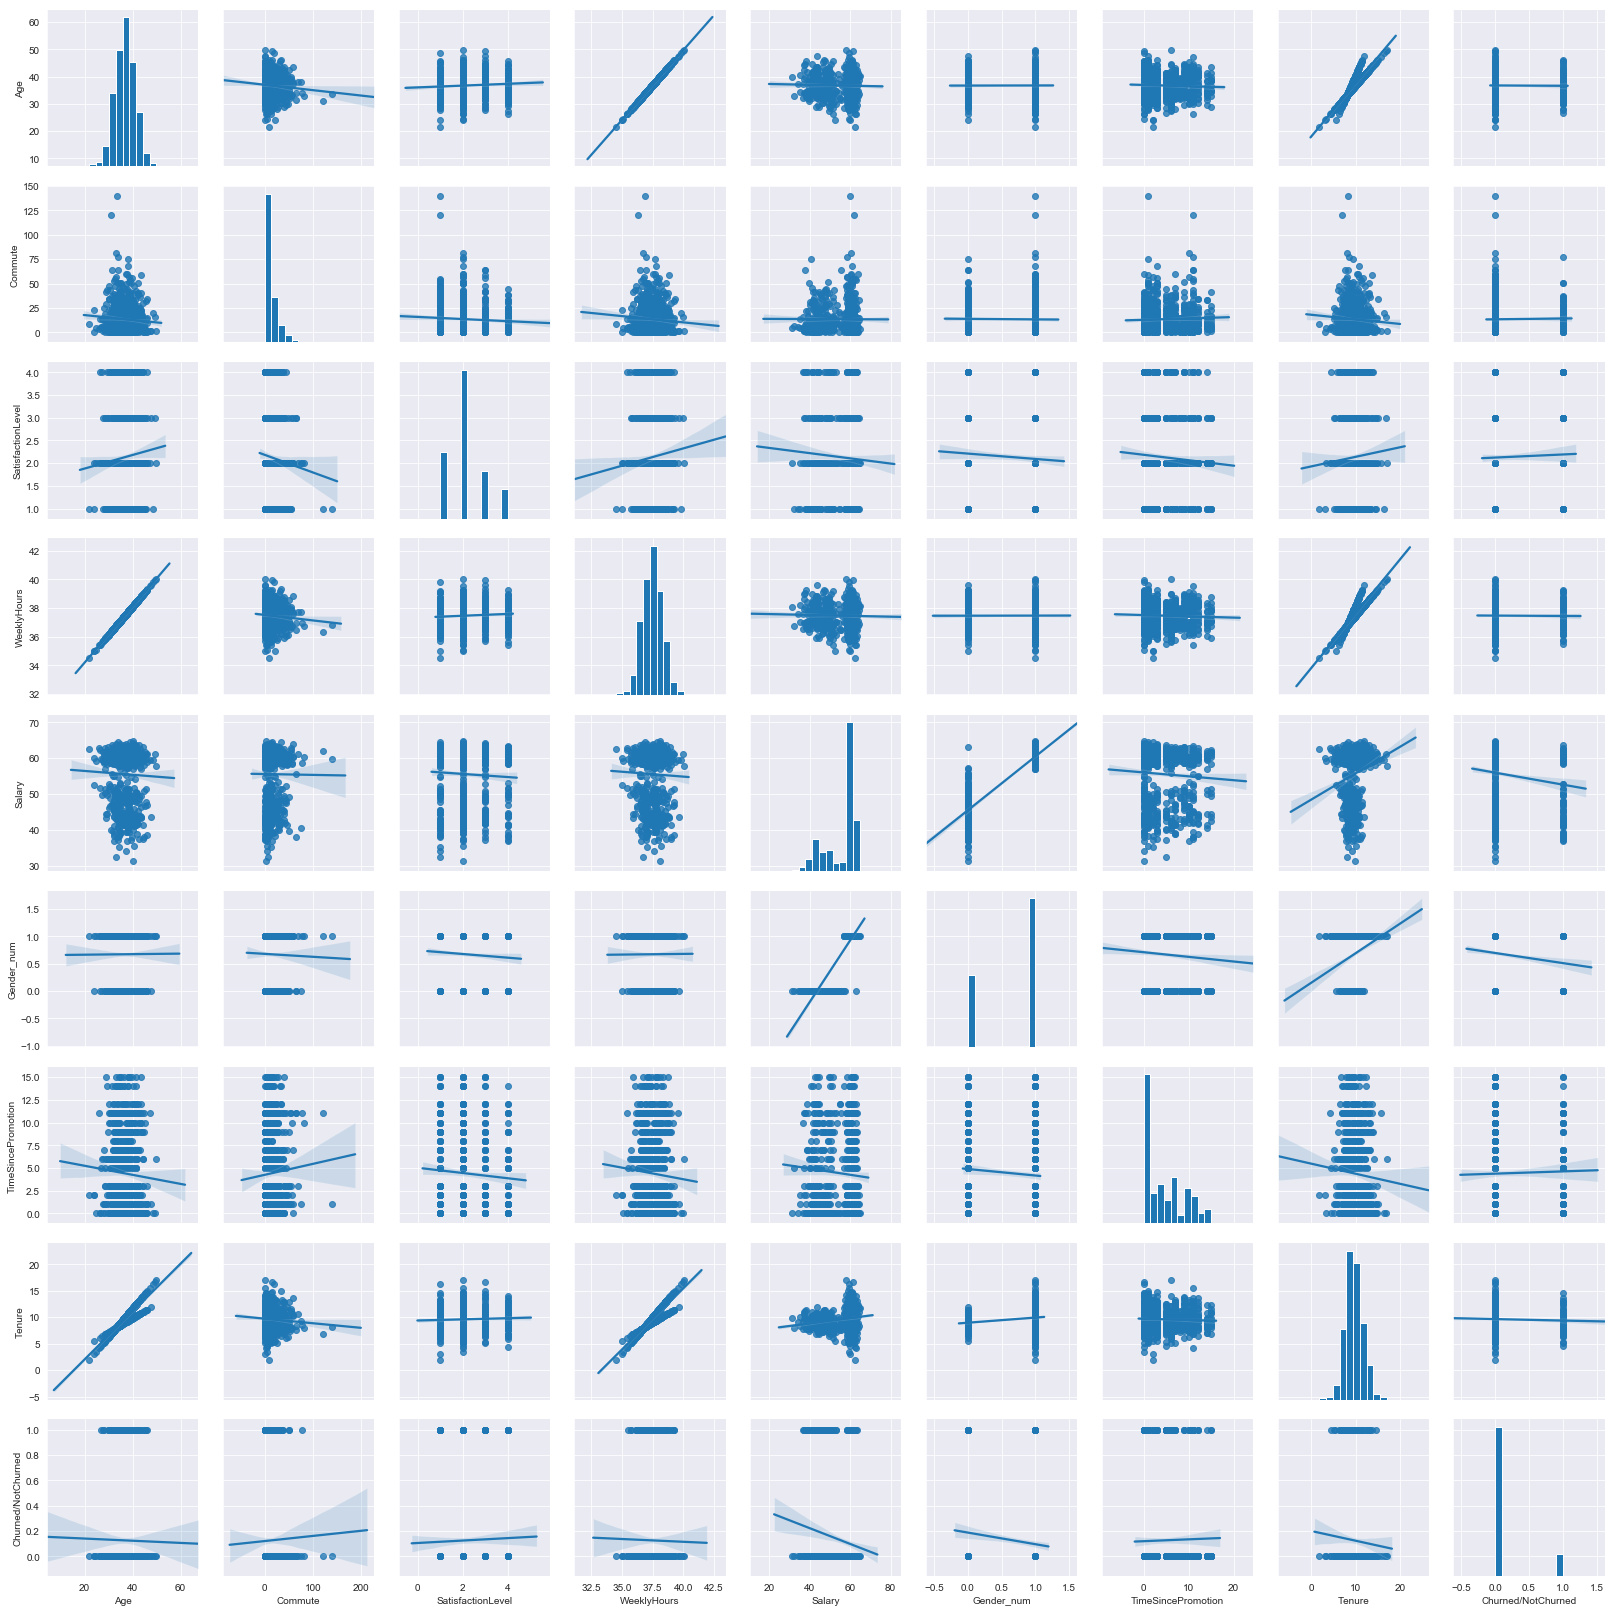

In [238]:
sns.pairplot(df3,vars=['Age', 'Commute', 'SatisfactionLevel', 'WeeklyHours','Salary', 'Gender_num','TimeSincePromotion', 'Tenure','Churned/NotChurned' ], kind='reg')

I think we can understand the relationship between our variables with more granularity by using the __Gender_num__ column to add contrast. We will re-run the pairplot with the hue set to Gender.

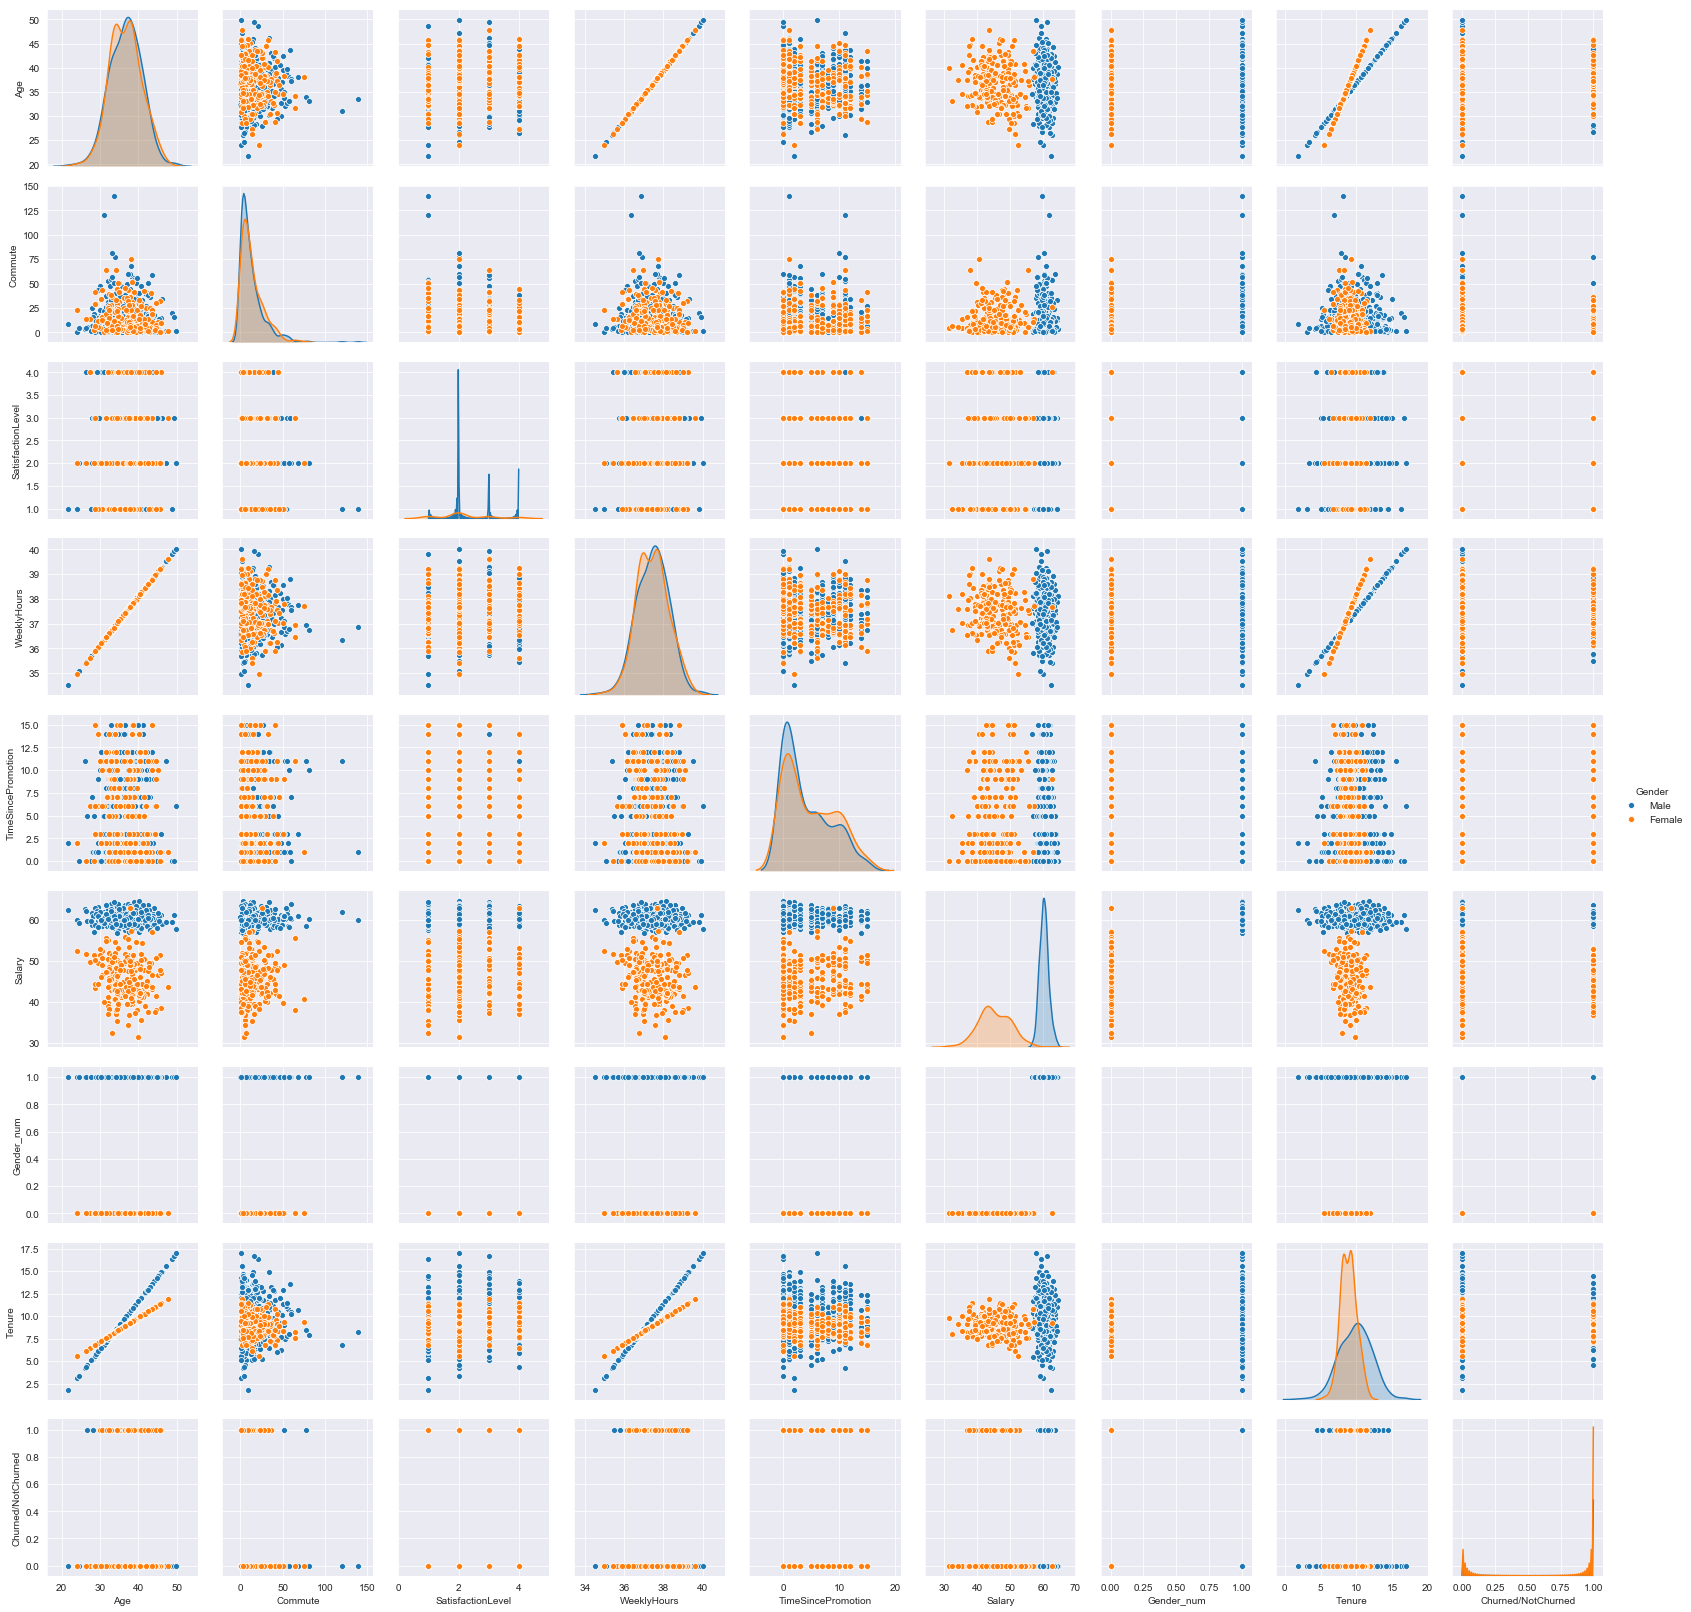

In [237]:
sns.pairplot(df3, hue='Gender', vars=['Age', 'Commute', 'SatisfactionLevel','WeeklyHours', 'TimeSincePromotion', 'Salary','Gender_num', 'Tenure','Churned/NotChurned' ])

Here we can see some interesting relationships. 

* As __Age__ increase so does __Tenure__ both for male and female. For men it is almost perfectly linear.
* Females leave Aero-Tech at the 10 year mark in big numbers
* We have a substantial salary issue when broken down by __Gender__ with the majority of male centered at the 60 mark.

We can calculate the correlation figures and then plot the heatmap. A perfectly correlated set of variables will have a score of 1 and perectly negatively correlated set of variables will have a score of -1.

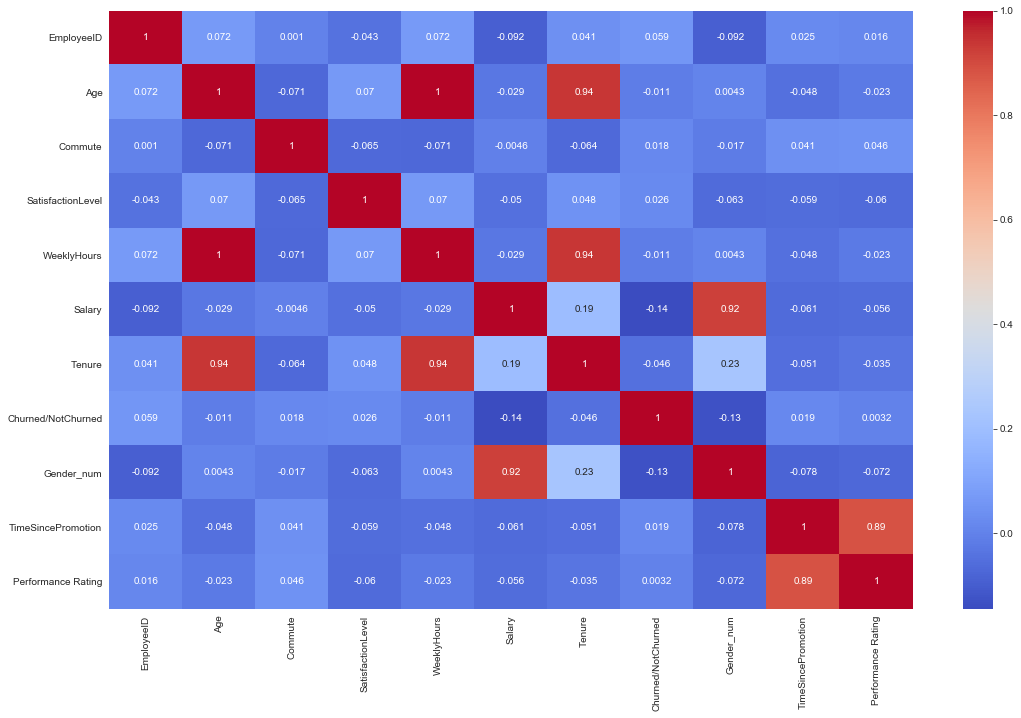

In [239]:
df3.corr()
sns.heatmap(df3.corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
So from the correlation matr

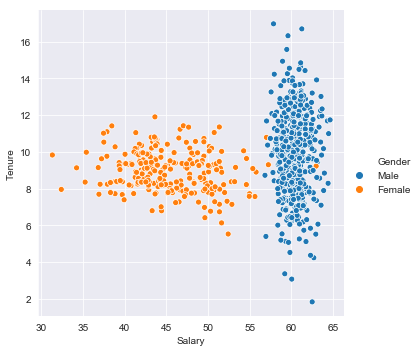

In [240]:
sns.relplot(x="Salary", y='Tenure', hue="Gender", data=df3)
plt.rcParams["figure.figsize"] = (18,11)
plt.show()


In [241]:
df3.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,246.0,45.446358,4.861280,31.319454,42.102451,44.744035,49.177333,62.992175
Male,504.0,60.468656,1.364965,56.845992,59.512004,60.381359,61.317758,64.666916


## References

ALBON, C,. __Machine Learning with Python Cookbook__ 2018 California: O'Reilly

BURKOV, A,. __The Hundred-Page Machine Learning Page__ 2019 

DELL EMC EDUCATION SERVICES, __Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data__ 2015, Indiana: WILEY

HASTIE, T. TIBSHIRANI, R. FRIEDMAN,J . __The Elements of Statistical Learning:Data Mining, Inference, and Prediction__ 2012, New York:Springer

GRUS, J., __Data Science From Scratch, First Principles with Python__ 2019, California: O'Reilly

O’BOYLE JR, E,. AGUINIS, H,. __THE BEST AND THE REST: REVISITING THE NORM OF NORMALITY OF INDIVIDUAL PERFORMANCE: PERSONNEL PSYCHOLOGY__ 2012, 65, 79–119 Accessed [here](https://pdfs.semanticscholar.org/4213/613c2a55119eaa8a646d626f60d066e67ccf.pdf?_ga=2.103413186.377128525.1575537163-691422004.1569577689)

KINNEY, W., __Python for Data Analysis__ 2018, California: O'Reilly

JAMES, J., WITTEN, D., HASTIE, T., TIBSHIRANI R., __An Introduction to Statistical Learning__ 2008, New York:Springer

## Websites

https://bids.berkeley.edu/news/simple-random-sampling-not-so-simple  [Accessed on November 13th 2019]

https://chrisalbon.com/  [Accessed first on November 12th 2019]

https://www.datacamp.com/community/tutorials/probability-distributions-python [Accessed on 23rd November 2019]

https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html [Accessed on November 12th 2019]

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.standard_t.html?highlight=student [Accessed on November 12th 2019]

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.gamma.html [Accessed on November 12th 2019]

https://github.com/chrisalbon [Accessed on November 12th 2019]

https://github.com/susanli2016 [Accessed on November 12th 2019]

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset [Accessed on November 12th 2019]

https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7 [Accessed on November 12th 2019]

# End